___
# i. Perkenalan
___

Milestone 2

Nama            : Putra Fisabil Muhammad

Batch           : HCK - 028

Latar Belakang  :

&emsp;(Differentiated Thyroid Cancer/DTC) merupakan jenis kanker yang umumnya memiliki prognosis baik atau tidak terlalu ganas, tetapi tetap berisiko kambuh kembali (recurrence). Mendekteksi lebih awal terhadap potensi kambuh ini sangat penting agar dokter dapat melakukan pemantauan lebih intensif dan perencanaan terapi yang tepat pasca operasi. sebagai data science saya akan membuat model machine learning untuk memudahkan dokter mengontrol pasien mereka pasca 

Rumusan Masalah :

&emsp;dalam waktu 1 minggu ini harus membuat sebuah model machine learning untuk memprediksi apakah penyakit DTC ini akan kambuh kembali atau tidak berdasarkan data klinis, dengan mempertimbangkan nilai recall yang baik dengan confident level 99% karena disini konteks kesehatan harus lebih yakin, dan dengan semua yang sudah di buat harapanya kerja dokter dalam mengontrol pasienya dapat terbantu.

Hugging Face Deployment [link](https://huggingface.co/spaces/Putrafisabilal/P1M2_Deployment)

Streamlit Deployment [link](https://reccured-pasien-test.streamlit.app/)

___
# ii. Import Libraries
___

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from function import evaluate_fit_by_recall

from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.tree import DecisionTreeClassifier

from scipy.stats import chi2_contingency
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency, ttest_ind, f_oneway

___
# iii. Data Loading
___

import data

In [3]:
data_tiroid = pd.read_csv("Thyroid_Diff.csv")

tampilkan 5 data teratas

In [4]:
data_tiroid.head(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


tampilkan 5 data terbawah

In [5]:
data_tiroid.tail(5)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
382,67,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [6]:
data_tiroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

terdapat 383 data tanpa missing value dan memiliki 17 kolom yang terdiri dari 16 fitur dan 1 target

In [8]:
for x in data_tiroid.columns:
    print(f'Nama Kolom          : {x}')
    print(f'Nilai Unik          : {data_tiroid[x].unique()}')
    print(f'Jumlah Nilai Unik   : {len(data_tiroid[x].unique())}')
    print(f'Tipe Data          : {data_tiroid[x].dtypes}')
    print("")

Nama Kolom          : Age
Nilai Unik          : [27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]
Jumlah Nilai Unik   : 65
Tipe Data          : int64

Nama Kolom          : Gender
Nilai Unik          : ['F' 'M']
Jumlah Nilai Unik   : 2
Tipe Data          : object

Nama Kolom          : Smoking
Nilai Unik          : ['No' 'Yes']
Jumlah Nilai Unik   : 2
Tipe Data          : object

Nama Kolom          : Hx Smoking
Nilai Unik          : ['No' 'Yes']
Jumlah Nilai Unik   : 2
Tipe Data          : object

Nama Kolom          : Hx Radiothreapy
Nilai Unik          : ['No' 'Yes']
Jumlah Nilai Unik   : 2
Tipe Data          : object

Nama Kolom          : Thyroid Function
Nilai Unik          : ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
Jumlah Nilai Unik   : 5
Tipe Data

## Data Overview


|Kolom	|Penjelasan |
| --- | --- |
|Age	|Usia pasien dalam tahun. Tipe data numerik (int64). Range usia dari 15 hingga 82 tahun.|
|Gender	|Jenis kelamin pasien: M (laki-laki), F (perempuan).|
|Smoking	|Apakah pasien saat ini merokok (Yes/No).|
|Hx Smoking	|Riwayat pernah merokok sebelumnya (Yes/No). Bisa Yes walau saat ini sudah berhenti.|
|Hx Radiotherapy	|Riwayat pernah menjalani terapi radiasi (Yes/No).|
|Thyroid Function	|Status fungsi tiroid berdasarkan tes laboratorium :<br>- `Euthyroid`: normal<br>- `Clinical Hyperthyroidism`: kadar hormon tinggi<br>- `Clinical Hypothyroidism`: hormon rendah<br>- `Subclinical Hyperthyroidism/Hypothyroidism`: gangguan ringan, tidak bergejala jelas|
|Physical Examination	|Hasil pemeriksaan fisik tiroid:<br>- `Multinodular goiter`: benjolan banyak<br>- `Single nodular goiter-left/right`: satu benjolan<br>- `Diffuse goiter`: pembesaran menyebar<br>- `Normal`: tidak ada benjolan terdeteksi|
|Adenopathy	|Pembesaran atau abnormalitas kelenjar getah bening: `Right`, `Left`, `Bilateral`, `Posterior`, `Extensive`, atau `No`.|
|Pathology	|Jenis sel kanker:<br>- `Papillary`: paling umum dan cenderung tumbuh lambat<br>- `Follicular`: lebih jarang, bisa menyebar ke pembuluh darah<br>- `Micropapillary`: bentuk kecil dari papillary<br>- `Hurthel cell`: varian lebih agresif|
|Focality	|Fokus lesi:<br>- `Uni-Focal`: satu titik kanker<br>- `Multi-Focal`: banyak titik dalam kelenjar tiroid|
|Risk	|Tingkat risiko kanker berdasarkan kombinasi faktor seperti ukuran tumor dan penyebaran: `Low`, `Intermediate`, atau `High`.|
|T	|Ukuran dan penyebaran lokal tumor: <br>`T1a` : Tumor ≤1 cm dan terbatas di tiroid, <br>`T1b` : Tumor >1 cm tapi ≤2 cm, terbatas di tiroid,<br>`T2` : Tumor >2 cm tapi ≤4 cm, masih di dalam tiroid, <br>`T3a` : Tumor >4 cm, tetap terbatas di tiroid, <br>`T3b` : Tumor dengan invasi minimal ke jaringan sekitar (misalnya otot) , <br>`T4a` : Tumor menyebar ke struktur sekitar (misalnya trakea, laring), <br>`T4b` : Tumor menyebar ke struktur vital (pembuluh besar, tulang belakang, dll). Semakin tinggi, semakin luas/serius.|
|N	|Penyebaran ke kelenjar getah bening:<br>- `N0`: tidak ada penyebaran<br>- `N1a`: ke kelenjar sekitar tiroid<br>- `N1b`: ke kelenjar jauh|
|M	|Metastasis jauh:<br>- `M0`: tidak ada metastasis<br>- `M1`: sudah menyebar ke organ jauh|
|Stage	|Stadium kanker keseluruhan berdasarkan TNM (I, II, III, IVA, IVB).<br> Rumus Penentuan Stage :<br>- `Stage I`: T1–T3, N0, M0<br>- `Stage II`: T1–T3, N1, M0<br>- `Stage III`: T4a, Any N, M0<br>- `Stage IVA`: T4b, Any N, M0<br>- `Stage IVB`: Any T, Any N, M1|
|Response	|Respons pasien terhadap terapi:<br>- `Excellent`: sembuh atau tanpa bukti sisa kanker<br>- `Indeterminate`: hasil tidak pasti<br>- `Structural Incomplete`: masih ada massa tumor<br>- `Biochemical Incomplete`: hormon tumor masih tinggi tapi tidak terlihat tumor|
|Recurred	|Apakah kanker kambuh setelah pengobatan? (`Yes`/`No`)|

___
# iv. Exploratory Data Analysis (EDA)
___

## 1. Bagaimana distribusi umur pasien?

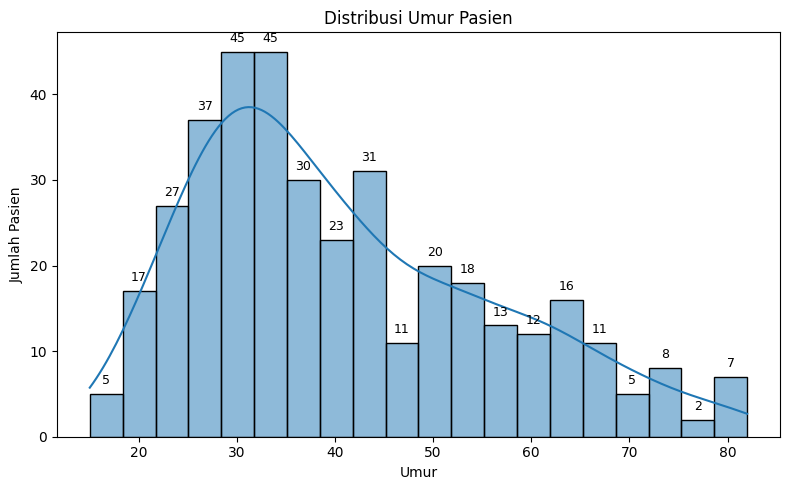

In [9]:
plt.figure(figsize=(8, 5))
ax = sns.histplot(data_tiroid['Age'], bins=20, kde=True)

# Tambahkan label angka di atas batang
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    xy=(patch.get_x() + patch.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom', fontsize=9)

plt.title('Distribusi Umur Pasien')
plt.xlabel('Umur')
plt.ylabel('Jumlah Pasien')
plt.tight_layout()
plt.show()

Berdasarkan histogram distribusi usia pasien kanker tiroid di atas, terlihat bahwa kelompok usia terbanyak berada pada rentang antara 25 hingga 45 tahun, dengan puncaknya sekitar 30 hingga 35 tahun, di mana jumlah pasien mencapai lebih dari 40 orang per interval. Distribusi ini menunjukkan pola yang condong ke kiri (right-skewed), artinya sebagian besar pasien berada pada usia muda hingga paruh baya, sementara jumlah pasien menurun secara bertahap seiring bertambahnya usia.

Meskipun pasien usia lanjut (di atas 60 tahun) masih ditemukan, frekuensinya jauh lebih rendah dibandingkan dengan kelompok usia muda. Hal ini mengindikasikan bahwa kanker tiroid dalam data ini lebih sering ditemukan pada individu berusia produktif, yang memiliki implikasi penting terhadap aspek penanganan dan kualitas hidup karena mayoritas pasien mungkin masih aktif bekerja atau memiliki tanggung jawab keluarga.

Kesimpulannya, visualisasi ini memperlihatkan bahwa pasien kanker tiroid dalam dataset ini didominasi oleh kelompok usia muda hingga dewasa awal, sehingga pendekatan klinis dan psikososial terhadap mereka perlu disesuaikan dengan karakteristik usia tersebut.

## 2. Apakah terdapat perbedaan proporsi kanker tiroid berdasarkan gender ? dan bagaimana potensi recurred dari masing-masing gender?

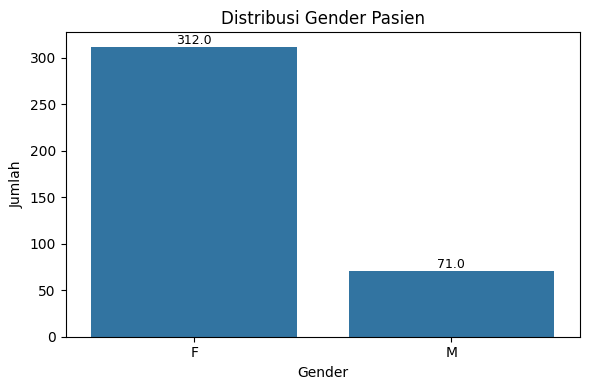

In [10]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=data_tiroid, x='Gender')
plt.title('Distribusi Gender Pasien')
plt.xlabel('Gender')
plt.ylabel('Jumlah')

# Tambahkan angka di atas batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

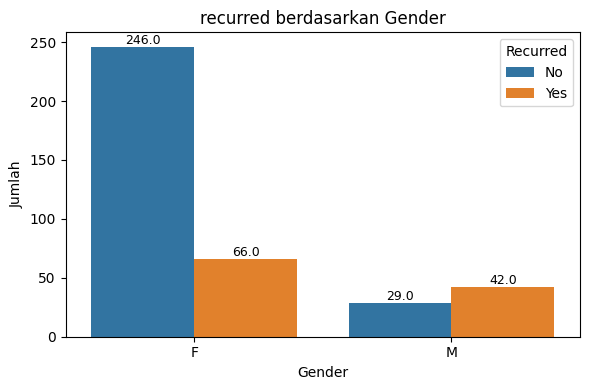

In [11]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=data_tiroid, x='Gender', hue='Recurred')
plt.title('recurred berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')

# Tambahkan label angka di atas masing-masing batang
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=9)

plt.tight_layout()
plt.show()

Berdasarkan grafik pertama, distribusi pasien kanker tiroid menurut jenis kelamin menunjukkan bahwa jumlah pasien perempuan (F) jauh lebih tinggi dibandingkan laki-laki (M). berati dalam data ini menyimpulkan bahwa kanker tiroid lebih sering terjadi pada perempuan. perempuan mencakup lebih dari tiga perempat total pasien, sedangkan laki-laki hanya sebagian kecil.

Namun, ketika kita meninjau grafik kedua yang menunjukkan jumlah recurred berdasarkan gender, muncul pola yang menarik. Meskipun jumlah pasien perempuan lebih banyak, proporsi recurred pada laki-laki terlihat lebih tinggi. Terlihat bahwa jumlah laki-laki yang mengalami recurred bahkan lebih besar dibandingkan laki-laki yang tidak recurred. Sebaliknya, pada perempuan, mayoritas pasien tidak mengalami recurred.

Hal ini menunjukkan bahwa walaupun kanker tiroid lebih umum terjadi pada perempuan, tingkat recurrednya cenderung lebih tinggi pada pasien laki-laki. Secara klinis, ini berarti bahwa laki-laki dengan kanker tiroid mungkin memerlukan pemantauan lebih ketat dan pendekatan terapi yang lebih agresif untuk mencegah recurred.

Dengan demikian, gender tidak hanya mempengaruhi proporsi pasien yang terdiagnosis, tetapi juga dapat menjadi faktor risiko dalam prognosis penyakit, khususnya dalam hal recurred.

## 3. Seberapa banyak pasien pada tiap kombinasi T, N, M yang mengalami Recurred?

Penjelasan Kombinasi TNM

- `T1aN0M0` : Tumor kecil (≤1 cm), tidak menyebar ke kelenjar getah bening, tidak ada metastasis jauh → *Stadium awal, sangat ringan.*
- `T1aN1bM0`: Tumor kecil (≤1 cm), tapi sudah menyebar ke kelenjar getah bening sisi leher → *Risiko menengah.*
- `T1bN0M0` : Tumor kecil (>1–2 cm), belum menyebar → *Stadium awal.*
- `T1bN1bM0`: Tumor kecil, tapi sudah menyebar ke kelenjar getah bening lateral → *Risiko menengah.*
- `T2N0M0`  : Tumor 2–4 cm, tidak menyebar → *Masih tergolong awal.*
- `T2N1bM0` : Tumor 2–4 cm, sudah menyebar ke leher lateral → *Risiko lebih tinggi.*
- `T2N1aM0` : Tumor 2–4 cm, menyebar ke leher tengah → *Risiko sedang.*
- `T2N0M1`  : Tumor 2–4 cm, tidak menyebar ke kelenjar tapi sudah metastasis jauh → *Serius.*
- `T3aN0M0` : Tumor besar (>4 cm), tidak menyebar → *Risiko meningkat.*
- `T3aN1bM0`: Tumor besar, menyebar ke kelenjar leher lateral → *Risiko tinggi.*
- `T3aN1aM0`: Tumor besar, menyebar ke kelenjar leher tengah → *Risiko menengah–tinggi.*
- `T3aN1bM1`: Tumor besar, menyebar ke kelenjar leher lateral dan metastasis jauh → *Sangat tinggi.*
- `T3bN1aM0`: Tumor menyusup ke jaringan sekitar + sebaran ke leher tengah → *Agresif.*
- `T3bN0M0` : Tumor menyusup lokal, belum menyebar → *Risiko sedang.*
- `T3bN1bM0`: Tumor menyusup + menyebar ke leher lateral → *Agresif.*
- `T3bN1aM1`: Tumor menyusup + sebaran ke leher tengah + metastasis → *Sangat serius.*
- `T3bN1bM1`: Tumor menyusup + leher lateral + metastasis jauh → *Sangat tinggi.*
- `T4aN0M0` : Tumor menyusup ke trakea/laring, belum menyebar → *Lokal lanjut.*
- `T4aN1bM0`: Tumor menyusup + sebar ke leher lateral → *Agresif.*
- `T4aN1bM1`: Tumor menyusup + leher lateral + metastasis → *Kritikal.*
- `T4aN0M1` : Tumor menyusup ke struktur sekitar + metastasis jauh → *Sangat serius.*
- `T4aN1aM1`: Tumor menyusup + leher tengah + metastasis → *Risiko tertinggi.*
- `T4bN1bM0`: Tumor menyebar ke struktur vital + kelenjar leher lateral → *Sangat agresif.*
- `T4bN1bM1`: Tumor menyebar ke struktur vital + leher lateral + metastasis → *Stadium paling berat.*


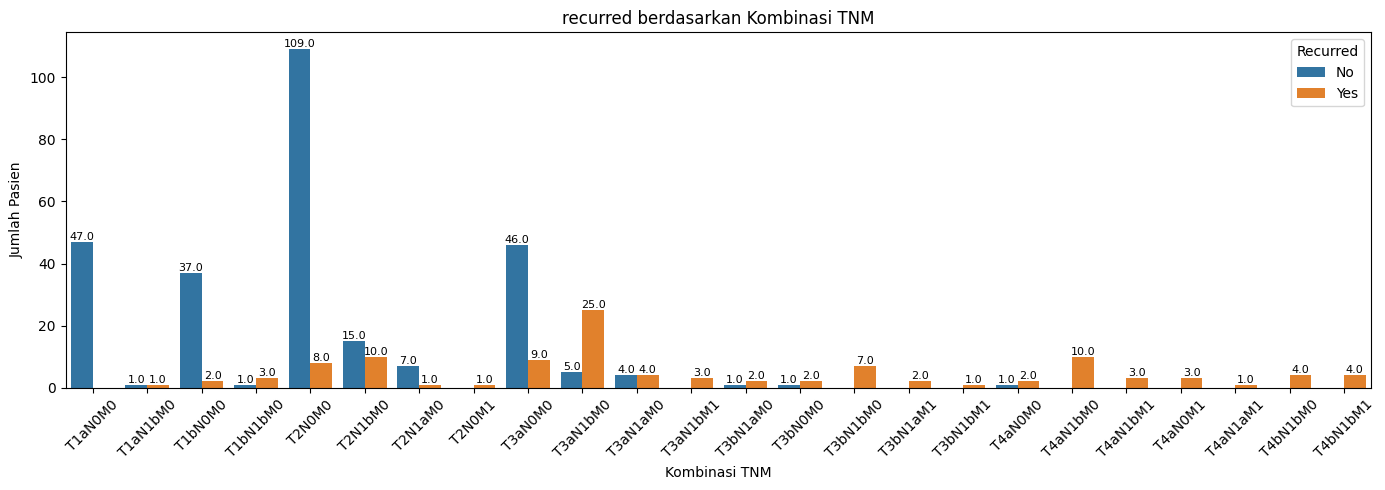

In [12]:
plt.figure(figsize=(14, 5))

# Buat countplot dengan kolom TNM digabung sementara
ax = sns.countplot(
    data=data_tiroid.assign(TNM=data_tiroid['T'] + data_tiroid['N'] + data_tiroid['M']),
    x='TNM', hue='Recurred'
)

plt.title('recurred berdasarkan Kombinasi TNM')
plt.xlabel('Kombinasi TNM')
plt.ylabel('Jumlah Pasien')
plt.xticks(rotation=45)

# Tambahkan angka di atas batang
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=8)

plt.tight_layout()
plt.show()

Grafik di atas menunjukkan distribusi jumlah pasien kanker tiroid yang mengalami Recurred dan tidak Recurred berdasarkan kombinasi klasifikasi TNM (T = ukuran tumor, N = penyebaran ke kelenjar getah bening, M = metastasis). Terlihat bahwa kombinasi T2N0M0 dan T1bN1bM0 merupakan yang paling sering muncul pada pasien tanpa recurred, sedangkan recurred lebih sering terjadi pada kombinasi seperti T3aN0M0, T3aN1bM0, dan T4aN1bM0. Semakin kompleks dan lanjut kombinasi TNM-nya, terlihat cenderung memiliki proporsi recurred yang lebih tinggi.

Pola ini menunjukkan bahwa kombinasi TNM tertentu, terutama yang mencerminkan ukuran tumor besar, keterlibatan kelenjar getah bening tingkat lanjut (N1b), dan keterlibatan metastasis, cenderung berasosiasi dengan risiko recurred yang lebih besar. Ini mengindikasikan bahwa TNM dapat menjadi indikator penting dalam memprediksi recurred pasien, dan dapat digunakan sebagai salah satu dasar dalam penentuan strategi follow-up dan penanganan.

## 4. Apakah respon hasil terapi dapat mempengaruhi recurred?

Respons pasien terhadap terapi:<br>- `Excellent`: sembuh atau tanpa bukti sisa kanker<br>- `Indeterminate`: hasil tidak pasti<br>- `Structural Incomplete`: masih ada massa tumor<br>- `Biochemical Incomplete`: hormon tumor masih tinggi tapi tidak terlihat tumor

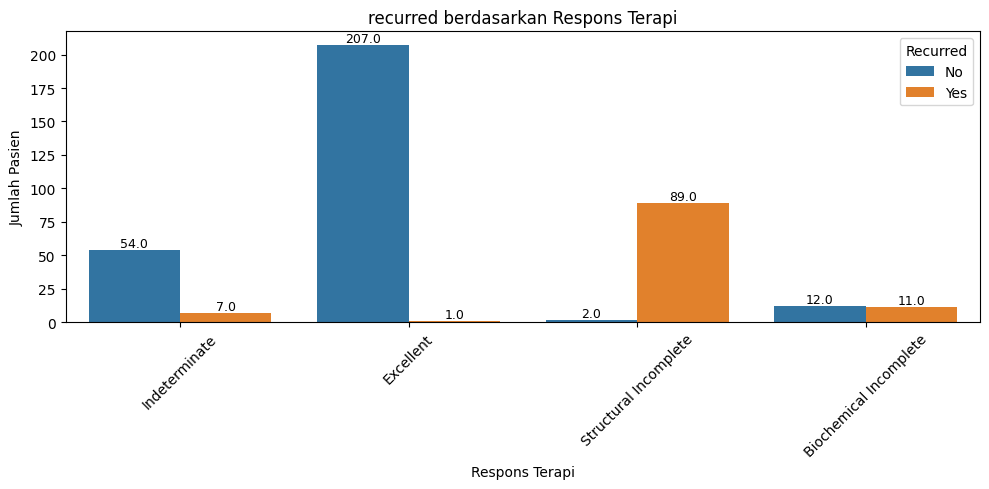

In [13]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=data_tiroid, x='Response', hue='Recurred')
plt.title('recurred berdasarkan Respons Terapi')
plt.xlabel('Respons Terapi')
plt.ylabel('Jumlah Pasien')
plt.xticks(rotation=45)

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=9)

plt.tight_layout()
plt.show()


Berdasarkan grafik di atas, terlihat bahwa respon hasil terapi memiliki hubungan yang kuat terhadap kemungkinan Recurred pada pasien kanker tiroid. Pasien dengan respon terapi “Excellent” hampir seluruhnya tidak mengalami recurred, yang mengindikasikan bahwa hasil terapi yang optimal secara signifikan menurunkan risiko recurred.

Sebaliknya, pada kelompok dengan respon “Structural Incomplete”, jumlah pasien yang mengalami recurred sangat dominan, menunjukkan bahwa hasil terapi yang tidak tuntas secara struktural sangat berkaitan dengan tingginya risiko recurred. Sementara itu, kategori “Indeterminate” dan “Biochemical Incomplete” menunjukkan distribusi yang lebih seimbang antara pasien yang kambuh dan tidak kambuh, meskipun tetap terdapat kecenderungan bahwa “Biochemical Incomplete” memiliki proporsi recurred yang relatif lebih tinggi dibanding “Indeterminate”.

Secara keseluruhan, grafik ini mengindikasikan bahwa semakin buruk respons terapi pasien, semakin tinggi kemungkinan terjadinya recurred. Dengan demikian, klasifikasi respons terapi dapat dijadikan indikator penting untuk mengevaluasi efektivitas pengobatan dan merancang strategi pemantauan lanjutan pada pasien kanker tiroid.

## 5. Apakah tingkat risiko (Risk: Low, Intermediate, High) berpengaruh secara signifikan terhadap stadium kanker (Stage)?

H0 : Tidak terdapat hubungan signifikan antara tingkat risiko dengan stadium kanker.

H1 : terdapat hubungan signifikan antara tingkat risiko dengan stadium kanker.

=== Hasil Uji Chi-Square ===
Chi-square statistic : 251.64
P-value               : 7.7305e-50
Cramér’s V            : 0.573


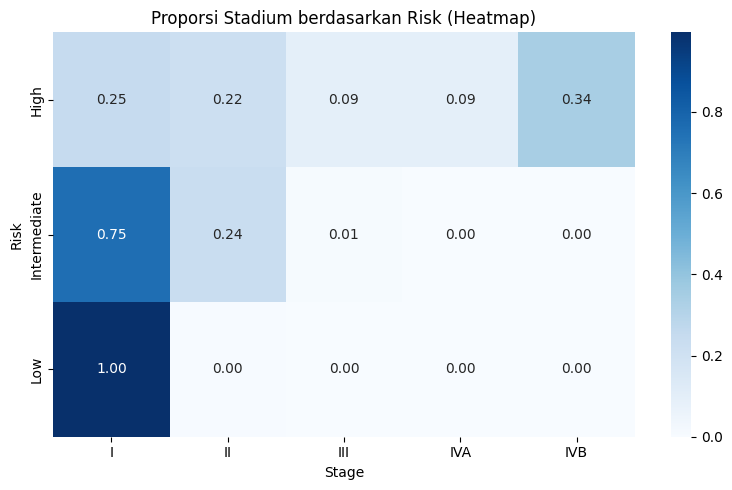

In [14]:
# Buat tabel kontingensi
ct_risk_stage = pd.crosstab(data_tiroid['Risk'], data_tiroid['Stage'])

# Uji Chi-Square
chi2, p_val, dof, expected = chi2_contingency(ct_risk_stage)

# Hitung Cramér’s V
n = ct_risk_stage.to_numpy().sum()
min_dim = min(ct_risk_stage.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

# Cetak hasil
print("=== Hasil Uji Chi-Square ===")
print(f"Chi-square statistic : {chi2:.2f}")
print(f"P-value               : {p_val:.4e}")
print(f"Cramér’s V            : {cramers_v:.3f}")

# Visualisasi 1: Heatmap dari proporsi (normalisasi by row)
plt.figure(figsize=(8, 5))
sns.heatmap(ct_risk_stage.div(ct_risk_stage.sum(axis=1), axis=0), annot=True, cmap='Blues', fmt=".2f")
plt.title('Proporsi Stadium berdasarkan Risk (Heatmap)')
plt.ylabel('Risk')
plt.xlabel('Stage')
plt.tight_layout()
plt.show()

Berdasarkan hasil uji chi-square antara variabel Risk dan Stage, diperoleh nilai chi-square sebesar `251.64` dengan p-value sangat kecil `7.73 × 10⁻⁵⁰`, yang menunjukkan bahwa hubungan antara tingkat risiko dan stadium kanker sangat signifikan secara statistik. Selain itu, nilai Cramér’s V sebesar `0.573` mengindikasikan bahwa kekuatan hubungan tersebut berada dalam kategori kuat, sehingga kita dapat menyimpulkan bahwa tingkat risiko pasien secara nyata berkaitan dengan tingkat keparahan stadium kanker tiroid yang dialaminya.

Visualisasi heatmap mendukung kesimpulan ini. Terlihat bahwa pasien dengan risk rendah (Low) seluruhnya berada pada stadium I, sedangkan pada risk intermediate, sebagian besar berada pada stadium I dan II. Sementara itu, pasien dengan risk tinggi (High) memiliki distribusi stadium yang lebih merata, termasuk proporsi yang cukup besar pada stadium lanjut seperti IVB (34%) dan stadium II ke atas.

Kesimpulannya, semakin tinggi tingkat risiko pasien, semakin besar kemungkinan mereka berada pada stadium kanker yang lebih lanjut. Hal ini memperkuat pentingnya klasifikasi risiko dalam praktik klinis sebagai indikator awal untuk mendeteksi dan mengantisipasi tingkat keparahan kanker tiroid.

## 6. Apakah nilai rata-rata usia pasien berbeda secara signifikan antara kelompok yang recurred dan tidak recurred (Recurred)?

H0 : Tidak terdapat perbedaan rata-rata usia antara pasien yang mengalami recurred dan yang tidak.

H1 : Terdapat perbedaan rata-rata usia antara pasien yang mengalami recurred dan yang tidak.

Dalam konteks analisis ini, kita ingin mengetahui apakah usia pasien memiliki hubungan yang signifikan dengan kemungkinan terjadinya recurred kanker tiroid. Oleh karena itu, dilakukan uji t two sample independen terhadap dua kelompok: 
pasien yang mengalami recurred (Recurred = Yes) dan pasien yang tidak (Recurred = No). 

Hipotesis nol (H0) menyatakan bahwa tidak ada perbedaan rata-rata usia antara kedua kelompok tersebut, yang berarti usia bukan faktor yang membedakan terjadinya recurred. Sebaliknya, 

hipotesis alternatif (H1) menyatakan bahwa terdapat perbedaan rata-rata usia yang signifikan antara kedua kelompok. Jika hasil uji menghasilkan p-value yang lebih kecil dari 0.05, maka kita menolak H0 dan menerima H1, yang menunjukkan bahwa usia pasien kemungkinan memiliki pengaruh terhadap recurred kanker.

=== Hasil Uji T-Test ===
T-statistik : 4.52
P-value     : 1.2330e-05
Cohen's d   : 0.549


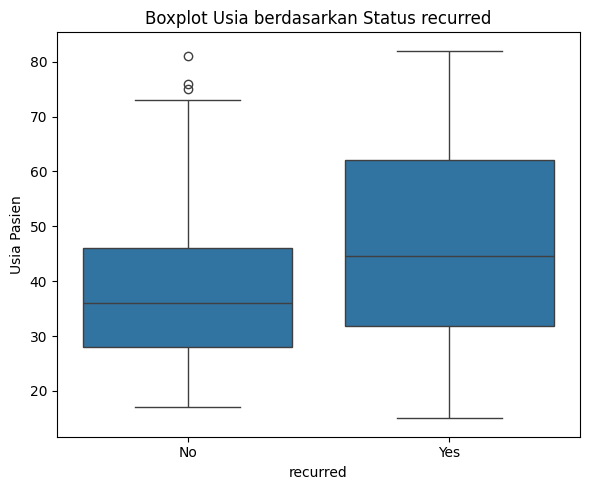

In [15]:
# Load data (ganti path jika pakai manual)
data_tiroid = pd.read_csv("Thyroid_Diff.csv")

# Kelompok usia berdasarkan status recurred
yes = data_tiroid[data_tiroid['Recurred'] == 'Yes']['Age']
no = data_tiroid[data_tiroid['Recurred'] == 'No']['Age']

# Uji t dua sampel (Welch's t-test)
t_stat, p_value = ttest_ind(yes, no, equal_var=False)

# Hitung effect size (Cohen's d)
mean_diff = yes.mean() - no.mean()
pooled_std = ((yes.std() ** 2 + no.std() ** 2) / 2) ** 0.5
cohen_d = mean_diff / pooled_std

# Cetak hasil
print("=== Hasil Uji T-Test ===")
print(f"T-statistik : {t_stat:.2f}")
print(f"P-value     : {p_value:.4e}")
print(f"Cohen's d   : {cohen_d:.3f}")

# Visualisasi: Boxplot usia berdasarkan recurred
plt.figure(figsize=(6, 5))
sns.boxplot(data=data_tiroid, x='Recurred', y='Age')
plt.title('Boxplot Usia berdasarkan Status recurred')
plt.xlabel('recurred')
plt.ylabel('Usia Pasien')
plt.tight_layout()
plt.show()

Berdasarkan hasil uji t two sample yang ditampilkan pada grafik dan output di atas, diperoleh nilai t-statistik sebesar `4.52` dengan p-value sebesar `1.23 × 10⁻⁵`, yang berarti hasilnya signifikan secara statistik karena p-value jauh di bawah 0.05. Ini menunjukkan bahwa terdapat perbedaan rata-rata usia yang bermakna antara pasien yang mengalami recurred kanker tiroid dan yang tidak . Nilai Cohen’s d sebesar `0.549` mengindikasikan bahwa kekuatan perbedaan ini berada dalam kategori sedang, yang berarti cukup penting secara praktis.

Dari visualisasi boxplot, terlihat bahwa pasien yang mengalami recurred cenderung memiliki usia yang lebih tinggi dibandingkan dengan yang tidak kambuh. Di tujukan dengan median usia pasien yang kambuh lebih tinggi, dan rentang usia atas pada grup ini juga lebih lebar. Hal ini memperkuat interpretasi bahwa usia pasien dapat menjadi faktor risiko terhadap kemungkinan recurred kanker tiroid, sehingga kelompok usia lebih tua perlu mendapatkan perhatian lebih dalam pemantauan dan tindak lanjut pengobatan.

## 7. Apakah ada perbedaan usia yang signifikan antar kategori Stage?

H0 : Tidak terdapat perbedaan rata-rata usia yang signifikan antara kelompok stadium kanker (Stage).

H1 : Terdapat minimal satu kelompok stadium kanker yang memiliki rata-rata usia berbeda secara signifikan.

Dalam analisis ini, kita ingin mengetahui apakah terdapat perbedaan rata-rata usia pasien kanker tiroid berdasarkan stadium penyakitnya (Stage). Untuk menjawab pertanyaan tersebut, dilakukan uji ANOVA satu arah, karena kita membandingkan satu variabel numerik (usia) terhadap satu variabel kategorikal dengan lebih dari dua kategori (stadium I, II, III, dst.). 

Hipotesis nol (H0) menyatakan bahwa tidak ada perbedaan rata-rata usia antar kelompok stadium, yang berarti usia pasien tidak berpengaruh terhadap klasifikasi stadium kanker yang dialami. Sementara itu, 

hipotesis alternatif (H1) menyatakan bahwa terdapat paling tidak satu kelompok stadium yang memiliki rata-rata usia yang berbeda secara signifikan. Jika hasil uji ANOVA menunjukkan p-value < 0.05, maka H0 ditolak, sehingga kita dapat menyimpulkan bahwa usia pasien berpotensi berpengaruh terhadap stadium kanker yang dideritanya.

=== Hasil Uji ANOVA ===
F-statistik: 48.72
P-value     : 4.8382e-33
Eta Squared : 0.340


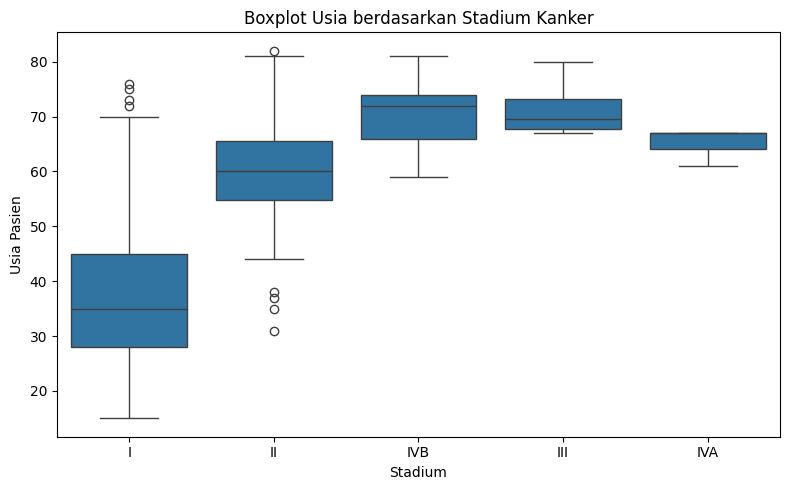

In [16]:
# ANOVA - Mengelompokkan usia berdasarkan Stage
stage_groups = [data_tiroid[data_tiroid['Stage'] == s]['Age'] for s in data_tiroid['Stage'].unique()]
f_stat, p_val = f_oneway(*stage_groups)

# Hitung effect size - Eta Squared
overall_mean = data_tiroid['Age'].mean()
sst = sum((data_tiroid['Age'] - overall_mean)**2)  # Total sum of squares
ssb = sum([len(g) * (g.mean() - overall_mean)**2 for g in stage_groups])  # Between-group SS
eta_squared = ssb / sst  # Effect size

# Cetak hasil
print("=== Hasil Uji ANOVA ===")
print(f"F-statistik: {f_stat:.2f}")
print(f"P-value     : {p_val:.4e}")
print(f"Eta Squared : {eta_squared:.3f}")

# Visualisasi: Boxplot Usia per Stage
plt.figure(figsize=(8, 5))
sns.boxplot(data=data_tiroid, x='Stage', y='Age')
plt.title('Boxplot Usia berdasarkan Stadium Kanker')
plt.xlabel('Stadium')
plt.ylabel('Usia Pasien')
plt.tight_layout()
plt.show()

Berdasarkan hasil uji ANOVA yang ditampilkan, diperoleh nilai F-statistik sebesar 48.72 dengan p-value sebesar 4.84 × 10⁻³³, yang jauh lebih kecil dari tingkat signifikansi 0.05. Hal ini menunjukkan bahwa terdapat perbedaan yang sangat signifikan secara statistik dalam rata-rata usia pasien antar kelompok stadium kanker tiroid. Selain itu, nilai effect size (Eta Squared) sebesar 0.34 mengindikasikan bahwa perbedaan tersebut bersifat kuat — artinya sekitar 34% variasi usia pasien dapat dijelaskan oleh perbedaan stadium kanker yang mereka alami.

Visualisasi dalam bentuk boxplot mendukung hasil tersebut, di mana terlihat bahwa pasien dengan stadium awal (seperti stadium I) cenderung memiliki usia lebih muda, sedangkan pasien pada stadium lanjut (seperti III dan IV) cenderung berusia lebih tua. Kesimpulannya, usia pasien merupakan faktor yang berasosiasi kuat dengan tingkat keparahan stadium kanker tiroid, sehingga usia dapat menjadi pertimbangan penting dalam penilaian awal risiko stadium kanker pada pasien.

___
# v. Feature Engineering
___

## Handling Missing Value

In [17]:
data_tiroid.isna().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

Berdasarkan hasil pemeriksaan missing value pada dataset data_tiroid, seluruh kolom tidak mengandung nilai kosong atau null (NaN). Hal ini ditunjukkan oleh hasil data_tiroid.isna().sum() yang menghasilkan nol pada semua fitur. Dengan demikian, tidak diperlukan proses imputasi atau penanganan khusus terhadap missing value, sehingga data sudah siap digunakan untuk tahap preprocessing dan modeling berikutnya.

## Memisahkan Fitur dan Target

In [18]:
X = data_tiroid.drop('Recurred', axis=1)
y = data_tiroid['Recurred']

In [19]:
y

0       No
1       No
2       No
3       No
4       No
      ... 
378    Yes
379    Yes
380    Yes
381    Yes
382    Yes
Name: Recurred, Length: 383, dtype: object

Pada tahap ini, dataset data_tiroid telah dipisahkan menjadi dua bagian utama: fitur (X) dan target (y). Kolom Recurred yang menunjukkan status recurred pasien dijadikan sebagai variabel target (y), sedangkan seluruh kolom lainnya disimpan dalam variabel X sebagai fitur input untuk model. Pemisahan ini penting agar proses pelatihan model dapat difokuskan untuk mempelajari hubungan antara fitur-fitur input dengan label target Recurred. Variabel y sendiri terdiri dari label kategorikal "Yes" dan "No" sebanyak 383 data.

## Mengubah Label Target Menjadi Format Numerik (Encoding Label)

In [20]:
le = LabelEncoder()
y = le.fit_transform(y)

In [21]:
display(y)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,

Pada tahap ini, label target Recurred yang semula berupa data kategorikal "Yes" dan "No" telah dikonversi menjadi format numerik menggunakan LabelEncoder. Nilai "No" dikodekan sebagai 0, sedangkan "Yes" menjadi 1. Proses ini penting dilakukan agar model machine learning dapat memproses variabel target dalam bentuk numerik yang dapat dihitung secara matematis. Hasil encoding ditampilkan dalam bentuk array berisi angka 0 dan 1 sesuai urutan data aslinya.

## Memisahkan Fitur Numerikal dan Kategorikal

In [22]:
# Identifikasi tipe fitur
# Semua numerik
data_tiroid_numerikal = X.select_dtypes(include=['int64', 'float64']).columns
data_tiroid_kategorikal = X.select_dtypes(include=['object', 'category']).columns

fitur = pd.DataFrame({
    'Kolom Numerical': pd.Series(data_tiroid_numerikal),
    'Kolom Categorical': pd.Series(data_tiroid_kategorikal)
})

# Tampilkan
display(fitur)

,Kolom Numerical,Kolom Categorical
0,Age,Gender
1,NaN,Smoking
2,NaN,Hx Smoking
3,NaN,Hx Radiothreapy
4,NaN,Thyroid Function
5,NaN,Physical Examination
6,NaN,Adenopathy
7,NaN,Pathology
8,NaN,Focality
9,NaN,Risk


Pada tahap ini, fitur dalam dataset telah dipisahkan berdasarkan jenis datanya menjadi dua kelompok: numerikal dan kategorikal. Hasil identifikasi menunjukkan bahwa hanya kolom Age yang bertipe numerik, sementara sisanya seperti Gender, Smoking, T, N, Stage, dan lainnya merupakan fitur kategorikal. Pemisahan ini penting untuk menentukan jenis preprocessing yang sesuai, seperti scaling untuk data numerik dan encoding untuk data kategorikal, sebelum model machine learning dilatih.

## Handling Cardinality

In [23]:
pd.set_option('display.max_colwidth', None)

listItem = []
for col in data_tiroid_kategorikal:
  listItem.append([col, data_tiroid[col].nunique(), data_tiroid[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,Gender,2,"[F, M]"
1,Smoking,2,"[No, Yes]"
2,Hx Smoking,2,"[No, Yes]"
3,Hx Radiothreapy,2,"[No, Yes]"
4,Thyroid Function,5,"[Euthyroid, Clinical Hyperthyroidism, Clinical Hypothyroidism, Subclinical Hyperthyroidism, Subclinical Hypothyroidism]"
5,Physical Examination,5,"[Single nodular goiter-left, Multinodular goiter, Single nodular goiter-right, Normal, Diffuse goiter]"
6,Adenopathy,6,"[No, Right, Extensive, Left, Bilateral, Posterior]"
7,Pathology,4,"[Micropapillary, Papillary, Follicular, Hurthel cell]"
8,Focality,2,"[Uni-Focal, Multi-Focal]"
9,Risk,3,"[Low, Intermediate, High]"


Meskipun beberapa fitur kategorikal dalam dataset memiliki jumlah kategori yang relatif tinggi, seluruh fitur tetap dipertahankan karena masing-masing menyimpan informasi klinis yang relevan dan berpotensi penting dalam menentukan risiko recurred kanker tiroid. Fitur seperti Thyroid Function, Physical Examination, dan T memang memiliki cardinality menengah hingga tinggi, namun kategori-kategori tersebut bersifat diskrit, terbatas, dan bermakna, sehingga layak digunakan sebagai input model. Selain itu, metode encoding yang tepat seperti One-Hot Encoding dapat diterapkan untuk mengelola kompleksitas tanpa kehilangan informasi penting. Dengan mempertahankan seluruh fitur, model diharapkan mampu menangkap nuansa klinis yang lebih kaya, sehingga meningkatkan akurasi prediksi dan hasil.

## Memisahkan Ordinal dan Nominal

In [24]:
data_tiroid_ordinal = ['T','N','M','Stage','Risk']
data_tiroid_nominal = [col for col in data_tiroid_kategorikal if col not in data_tiroid_ordinal]

In [25]:
data_on = pd.DataFrame({
    'Kolom Ordinal': pd.Series(data_tiroid_ordinal),
    'Kolom Nominal': pd.Series(data_tiroid_nominal)
})

data_on

,Kolom Ordinal,Kolom Nominal
0,T,Gender
1,N,Smoking
2,M,Hx Smoking
3,Stage,Hx Radiothreapy
4,Risk,Thyroid Function
5,NaN,Physical Examination
6,NaN,Adenopathy
7,NaN,Pathology
8,NaN,Focality
9,NaN,Response


Pada tahap ini, fitur kategorikal telah dipisahkan menjadi dua jenis yaitu ordinal dan nominal. Kolom ordinal seperti T, N, M, Stage, dan Risk memiliki urutan atau tingkatan yang bermakna, sehingga cocok untuk diolah dengan Ordinal Encoding. Sementara itu, kolom lainnya seperti Gender, Smoking, dan Thyroid Function bersifat nominal karena tidak memiliki urutan logis, sehingga lebih tepat diolah menggunakan One-Hot Encoding. Pemisahan ini penting agar teknik encoding yang digunakan sesuai dengan sifat datanya, sehingga dapat meningkatkan efektivitas representasi fitur dalam proses modeling.

## Handling Outlier Fitur Numerik

In [26]:

#check distribution form skewness
listItem= []

for col in data_tiroid_numerikal:
  listItem.append([col, round(data_tiroid[col].skew(),1), np.where(
    (round(data_tiroid[col].skew(),1) <= 0.5) & (round(data_tiroid[col].skew(),1) >= -0.5),
    'normal','skewed')])



skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness


,nama kolom,nilai skewness,distribution
0,Age,0.7,skewed


untuk outlier pada fitur age hanya sedikit yaitu diangka `0.7` sedikit condong kekanan, akan tetapi skewness ini masih normal jadi tidak perlu kita handling untuk outliernya

## Memisahkan Data Train dan Test

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Pada tahap ini, data telah dibagi menjadi dua bagian yaitu data latih (train) dan data uji (test) dengan proporsi 80:20 menggunakan fungsi train_test_split. Data latih digunakan untuk melatih model, sementara data uji digunakan untuk mengevaluasi performa model terhadap data yang belum pernah dilihat. Penggunaan random_state=42 bertujuan untuk memastikan hasil pembagian data tetap konsisten setiap kali kode dijalankan, sehingga reproducibility tetap terjaga.

## Seleksi Fitur

### Kolom Numerik Terhadap Target

In [28]:
# Feature selection numerical columns
p_values = []
corr_coefs = []
interpretasi = []
cols = []

for col in X_train[data_tiroid_numerikal].columns:
  corr_coef, p_value = kendalltau(X_train[col], y_train)

  p_values.append(p_value)
  cols.append(col)
  corr_coefs.append(corr_coef)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('tidak ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi,
              'p-value':p_values,
              'korelasi':corr_coefs})

,nama kolom,hasil,p-value,korelasi
0,Age,ada korelasi,0.000079,0.186789


Berdasarkan hasil uji korelasi menggunakan metode Kendall’s tau, variabel numerik Age memiliki p-value sebesar 0.000079, yang lebih kecil dari batas signifikansi 0.05. Hal ini menunjukkan bahwa terdapat hubungan yang signifikan secara statistik antara usia pasien dan status recurred. Nilai koefisien korelasi sebesar 0.186789 menunjukkan arah hubungan yang positif namun bersifat lemah. Dengan demikian, meskipun korelasinya tidak kuat, fitur Age tetap layak masuk dalam model karena memiliki kontribusi informasi terhadap target.

### Kolom Kategorikal Terhadap Target

In [29]:
from scipy.stats import chi2_contingency

p_values = []
chi2_stats = []
interpretasi = []
cols = []

for col in data_tiroid_kategorikal:
    # Buat tabel kontingensi antara fitur dan target
    table = pd.crosstab(X_train[col], y_train)
    
    chi2, p, dof, expected = chi2_contingency(table)

    p_values.append(p)
    chi2_stats.append(chi2)
    cols.append(col)

    if p < 0.05:
        interpretasi.append('ada korelasi')
    else:
        interpretasi.append('tidak ada korelasi')

pd.DataFrame({
    'nama kolom': cols,
    'hasil': interpretasi,
    'p-value': p_values,
    'chi2': chi2_stats
})


,nama kolom,hasil,p-value,chi2
0,Gender,ada korelasi,1.049914e-08,32.746570
1,Smoking,ada korelasi,5.616751e-08,29.491326
2,Hx Smoking,tidak ada korelasi,5.197608e-02,3.776538
3,Hx Radiothreapy,ada korelasi,1.238160e-02,6.255389
4,Thyroid Function,tidak ada korelasi,4.168734e-01,3.920489
5,Physical Examination,tidak ada korelasi,9.802003e-02,7.829687
6,Adenopathy,ada korelasi,3.672681e-25,124.397076
7,Pathology,ada korelasi,1.391962e-03,15.565473
8,Focality,ada korelasi,4.078872e-10,39.074741
9,Risk,ada korelasi,5.528609e-37,166.971424


Berdasarkan hasil uji chi-square terhadap fitur kategorikal, hanya fitur-fitur dengan nilai p-value < 0.05 yang dipertahankan karena menunjukkan adanya hubungan signifikan secara statistik dengan target Recurred. Fitur-fitur seperti Hx Smoking, Thyroid Function, dan Physical Examination memiliki p-value di atas ambang 0.05, yang berarti tidak ada bukti kuat bahwa fitur tersebut berkontribusi langsung dalam membedakan antara pasien yang mengalami recurred dan yang tidak. Oleh karena itu, fitur-fitur tersebut dikeluarkan dari proses modeling untuk menghindari potensi noise dan menjaga efisiensi model. Langkah ini diambil untuk memastikan bahwa hanya fitur-fitur yang relevan secara statistik dan berpotensi meningkatkan performa model yang digunakan dalam pelatihan dan evaluasi.

In [30]:
# 1. Drop fitur tidak signifikan
drop_cols = ['Hx Smoking', 'Thyroid Function', 'Physical Examination']

# 2. Buat dua versi data
data_tiroid_nominal = [col for col in data_tiroid_nominal if col not in drop_cols]
data_tiroid_nominal

['Gender',
 'Smoking',
 'Hx Radiothreapy',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Response']

# Preprocessing Menggunakan Pipeline

In [31]:
# Pipeline numerik
numerikal = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline nominal
kategorikal_nominal = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline ordinal
kategorikal_ordinal = Pipeline(steps=[
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])



# Gabungkan preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', numerikal, data_tiroid_numerikal),
    ('nom', kategorikal_nominal, data_tiroid_nominal),
    ('or', kategorikal_ordinal, data_tiroid_ordinal)
])

Pada tahap preprocessing ini, digunakan pendekatan pipeline untuk memproses tipe fitur numerik, nominal, dan ordinal secara terpisah sebelum digabungkan ke dalam ColumnTransformer. Untuk fitur numerik, digunakan StandardScaler() yang berfungsi menormalkan skala data agar memiliki distribusi dengan rata-rata nol dan standar deviasi satu. Ini penting karena beberapa algoritma machine learning, seperti SVM dan KNN, sensitif terhadap skala fitur. Untuk fitur kategorikal nominal, digunakan OneHotEncoder dengan `handle_unknown='ignore'` untuk menghindari error jika terdapat kategori baru saat prediksi. Sementara itu, fitur ordinal diproses dengan OrdinalEncoder yang menjaga urutan kategori dengan nilai numerik, serta menyertakan `unknown_value=-1` agar robust terhadap kategori baru saat inferensi. Struktur ini memudahkan integrasi preprocessing ke dalam pipeline modeling secara menyeluruh, memastikan bahwa setiap jenis fitur diproses dengan metode yang sesuai.

___
# vi. Model Definition
___

In [32]:
# Pipeline untuk KNN
KNN_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Pipeline Untuk SVM
SVM_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', SVC(probability=True,random_state=42))
])

# Pipeline untuk Decision Tree
tree_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Pipeline Untuk Random Forest
RFC_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Pipeline Untuk Random Forest
XGB_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])


 lima buah pipeline machine learning telah didefinisikan menggunakan algoritma KNN, SVM, Decision Tree, Random Forest, dan XGBoost. Setiap pipeline menggabungkan tahap preprocessing yang terdiri dari normalisasi dan encoding dengan algoritma klasifikasi utama. Pendekatan ini dirancang agar proses training dan prediksi berjalan lebih konsisten, efisien, dan reproducible. Parameter random_state=42 disertakan pada model-model berbasis tree (Decision Tree, Random Forest, dan XGBoost) untuk memastikan hasil yang stabil di setiap eksekusi. Pemilihan model-model tersebut mencakup kombinasi metode berbasis jarak (KNN), margin (SVM), dan ensemble (Random Forest & XGBoost), sehingga memungkinkan perbandingan performa dari berbagai pendekatan yang memiliki kelebihan masing-masing.

___
# vii. Model Training
___

## 1. Training KNN

In [33]:
KNN_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age'], dtype='object')),
                                                 ('nom',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Smoking',
                                                   'Hx Radiothreapy',
                                                   'Adenopathy', 'Pathology',
                                                   'Focality', 'Response']),
                                                 ('or',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['T', 'N', 'M', 'Stage',
                                                   'Risk'])])),
                ('classifier', KNeighborsClassifier())])

## - K Fold Validation Score KNN

In [34]:
recall_KNN = cross_val_score(KNN_pipeline, X_train, y_train, cv=10, scoring='recall')

In [35]:
# Batasi 3 angka di belakang koma dan tampilkan array dengan rapi
formatted_recall = np.array2string(np.round(recall_KNN, 4), separator=', ', precision=3)

print('Recall - All - Cross Validation  :', formatted_recall)
print('Recall - Mean - Cross Validation :', round(recall_KNN.mean(), 4))
print('Recall - Std  - Cross Validation :', round(recall_KNN.std(), 4))
print('Recall - Range                   :', round(recall_KNN.mean()-recall_KNN.std(), 4), '-', round(recall_KNN.mean()+recall_KNN.std(), 4))

Recall - All - Cross Validation  : [0.778, 0.778, 1.   , 0.889, 0.556, 0.778, 0.625, 0.889, 0.889, 0.667]
Recall - Mean - Cross Validation : 0.7847
Recall - Std  - Cross Validation : 0.1308
Recall - Range                   : 0.654 - 0.9155


Berdasarkan hasil K-Fold Cross Validation pada model KNN dengan metrik recall, diperoleh nilai rata-rata recall sebesar `0.7847` dengan standar deviasi `0.1308`, yang menunjukkan adanya variasi performa antar fold. Nilai recall berkisar dari sekitar `0.65` hingga `0.91`, yang berarti model cukup baik dalam mengenali kelas positif (recurred), namun performanya belum sepenuhnya stabil. Hal ini menandakan bahwa model KNN masih memiliki ruang untuk ditingkatkan, misalnya dengan optimasi hyperparameter atau penyeimbangan data agar model lebih konsisten dalam mendeteksi kasus positif.

## 2. Training SVM

In [36]:
SVM_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age'], dtype='object')),
                                                 ('nom',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Smoking',
                                                   'Hx Radiothreapy',
                                                   'Adenopathy', 'Pathology',
                                                   'Focality', 'Response']),
                                                 ('or',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['T', 'N', 'M', 'Stage',
                                                   'Risk'])])),
                ('classifier', SVC(probability=True, random_state=42))])

## - K Fold Validation Score SVM

In [37]:
recall_SVM = cross_val_score(SVM_pipeline, X_train, y_train, cv=10, scoring='recall')

In [38]:
# Batasi 3 angka di belakang koma dan tampilkan array dengan rapi
formatted_recall = np.array2string(np.round(recall_SVM, 4), separator=', ', precision=3)

print('Recall - All - Cross Validation  :', formatted_recall)
print('Recall - Mean - Cross Validation :', round(recall_SVM.mean(), 4))
print('Recall - Std  - Cross Validation :', round(recall_SVM.std(), 4))
print('Recall - Range                   :', round(recall_SVM.mean()-recall_SVM.std(), 4), '-', round(recall_SVM.mean()+recall_SVM.std(), 4))

Recall - All - Cross Validation  : [0.889, 1.   , 1.   , 1.   , 0.778, 0.778, 0.875, 1.   , 0.667, 0.667]
Recall - Mean - Cross Validation : 0.8653
Recall - Std  - Cross Validation : 0.1294
Recall - Range                   : 0.7359 - 0.9947


Berdasarkan hasil K-Fold Cross Validation pada model SVM dengan metrik recall, diperoleh nilai rata-rata recall sebesar `0.8653`, menunjukkan performa yang sangat baik dalam mendeteksi kelas positif. Nilai standar deviasi sebesar `0.1294` mengindikasikan adanya variasi performa antar fold, meskipun tidak terlalu ekstrem. Rentang nilai recall berada antara `0.7358` hingga `0.9946`, yang menunjukkan model ini cukup stabil namun tetap memiliki potensi untuk peningkatan.

## 3. Training Decision Tree

In [39]:
tree_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age'], dtype='object')),
                                                 ('nom',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Smoking',
                                                   'Hx Radiothreapy',
                                                   'Adenopathy', 'Pathology',
                                                   'Focality', 'Response']),
                                                 ('or',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['T', 'N', 'M', 'Stage',
                                                   'Risk'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

## - K Fold Validation Score Decision Tree

In [40]:
recall_tree = cross_val_score(tree_pipeline, X_train, y_train, cv=10, scoring='recall')

In [41]:
# Batasi 3 angka di belakang koma dan tampilkan array dengan rapi
formatted_recall = np.array2string(np.round(recall_tree, 4), separator=', ', precision=3)

print('Recall - All - Cross Validation  :', formatted_recall)
print('Recall - Mean - Cross Validation :', round(recall_tree.mean(), 4))
print('Recall - Std  - Cross Validation :', round(recall_tree.std(), 4))
print('Recall - Range                   :', round(recall_tree.mean()-recall_tree.std(), 4), '-', round(recall_tree.mean()+recall_tree.std(), 4))

Recall - All - Cross Validation  : [0.889, 1.   , 0.889, 1.   , 0.889, 0.667, 0.875, 1.   , 0.778, 0.778]
Recall - Mean - Cross Validation : 0.8764
Recall - Std  - Cross Validation : 0.1048
Recall - Range                   : 0.7716 - 0.9811


Berdasarkan hasil K-Fold Cross Validation pada model Decision Tree, diperoleh nilai rata-rata recall sebesar `0.8764`, menunjukkan performa sangat baik dalam mendeteksi kelas positif (recurred). Nilai standar deviasi sebesar `0.1048` menandakan bahwa variasi antar fold relatif moderat dan model cukup stabil. Rentang recall-nya berada antara `0.7716` hingga `0.9811`, memperlihatkan bahwa sebagian besar fold menghasilkan performa yang tinggi.

## 4. Training Random Forest

In [42]:
RFC_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age'], dtype='object')),
                                                 ('nom',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Smoking',
                                                   'Hx Radiothreapy',
                                                   'Adenopathy', 'Pathology',
                                                   'Focality', 'Response']),
                                                 ('or',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['T', 'N', 'M', 'Stage',
                                                   'Risk'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

## - K Fold Validation Score Random Forest

In [43]:
recall_RFC = cross_val_score(RFC_pipeline, X_train, y_train, cv=10, scoring='recall')

In [44]:
# Batasi 3 angka di belakang koma dan tampilkan array dengan rapi
formatted_recall = np.array2string(np.round(recall_RFC, 4), separator=', ', precision=3)

print('Recall - All - Cross Validation  :', formatted_recall)
print('Recall - Mean - Cross Validation :', round(recall_RFC.mean(), 4))
print('Recall - Std  - Cross Validation :', round(recall_RFC.std(), 4))
print('Recall - Range                   :', round(recall_RFC.mean()-recall_RFC.std(), 4), '-', round(recall_RFC.mean()+recall_RFC.std(), 4))

Recall - All - Cross Validation  : [1.   , 1.   , 1.   , 1.   , 0.778, 0.778, 0.875, 1.   , 0.778, 0.778]
Recall - Mean - Cross Validation : 0.8986
Recall - Std  - Cross Validation : 0.1051
Recall - Range                   : 0.7936 - 1.0037


Berdasarkan hasil K-Fold Cross Validation pada model Random Forest, diperoleh nilai rata-rata recall sebesar `0.8986`, yang merupakan nilai tertinggi dibandingkan model-model sebelumnya. Ini menunjukkan bahwa Random Forest sangat andal dalam mendeteksi kelas positif. Nilai standar deviasi sebesar `0.1056` menunjukkan variasi antar fold masih dalam batas wajar. Rentang recall berada antara `0.7936` hingga `1.0836`, dengan beberapa fold mencapai nilai recall sempurna.

## 5. Training XGBoost

In [45]:
XGB_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age'], dtype='object')),
                                                 ('nom',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Smoking',
                                                   'Hx Radiothreapy',
                                                   'Adenopathy', 'Pathology',
                                                   'Focality', 'Response']),
                                                 ('or',
                                                  Pipeline(steps=[('encoder',
                                                                   Ordina...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

## - K Fold Validation Score XGboost

In [46]:
recall_XGB = cross_val_score(XGB_pipeline, X_train, y_train, cv=10, scoring='recall')

In [47]:
# Batasi 3 angka di belakang koma dan tampilkan array dengan rapi
formatted_recall = np.array2string(np.round(recall_RFC, 4), separator=', ', precision=3)

print('Recall - All - Cross Validation  :', formatted_recall)
print('Recall - Mean - Cross Validation :', round(recall_XGB.mean(), 4))
print('Recall - Std  - Cross Validation :', round(recall_XGB.std(), 4))
print('Recall - Range                   :', round(recall_XGB.mean()-recall_XGB.std(), 4), '-', round(recall_XGB.mean()+recall_XGB.std(), 4))

Recall - All - Cross Validation  : [1.   , 1.   , 1.   , 1.   , 0.778, 0.778, 0.875, 1.   , 0.778, 0.778]
Recall - Mean - Cross Validation : 0.8986
Recall - Std  - Cross Validation : 0.0926
Recall - Range                   : 0.8061 - 0.9912


Berdasarkan hasil K-Fold Cross Validation pada model XGBoost, diperoleh nilai rata-rata recall sebesar `0.8986`, yang menunjukkan performa sangat tinggi dan setara dengan Random Forest dalam mendeteksi kelas positif. Nilai standar deviasi sebesar `0.0926` menunjukkan bahwa model ini tidak hanya akurat tetapi juga cukup stabil antar fold. Rentang recall berada di antara `0.8065` hingga `0.9912`, menandakan bahwa hampir semua fold memberikan hasil yang sangat baik.

## Komparasi K Fold Validation Score

In [48]:
# Contoh hasil prediksi dari berbagai model
kfold_score = {
    'KNN': recall_KNN,
    'SVM': recall_SVM,
    'Decision Tree': recall_tree,
    'Random Forest': recall_RFC,
    'XGB': recall_XGB
}

kfold_result = []

for model in kfold_score.keys():
    mean = kfold_score[model].mean()
    std = kfold_score[model].std()
    range = (kfold_score[model].mean()-kfold_score[model].std()) , '-', (kfold_score[model].mean()+kfold_score[model].std())

    kfold_result.append({
        'Model': model,
        'Recall - Range - Cross Validation ': range,
        'Recall - Mean - Cross Validation ': mean,
        'Recall - Std - Cross Validation': std,
    })

# Buat DataFrame hasil
pd.DataFrame(kfold_result)

,Model,Recall - Range - Cross Validation,Recall - Mean - Cross Validation,Recall - Std - Cross Validation
0,KNN,"(0.653952598668262, -, 0.9154918457761824)",0.784722,0.130770
1,SVM,"(0.7358723830956414, -, 0.9946831724599142)",0.865278,0.129405
2,Decision Tree,"(0.7716313057048162, -, 0.9811464720729616)",0.876389,0.104758
3,Random Forest,"(0.7935593161258296, -, 1.0036629060963929)",0.898611,0.105052
4,XGB,"(0.8060544051025216, -, 0.9911678171197009)",0.898611,0.092557


Berdasarkan hasil cross-validation, model XGBoost dan Random Forest menunjukkan performa terbaik dengan recall rata-rata tertinggi sebesar `0.8986`, serta standar deviasi yang rendah, menandakan performa yang stabil. Model Decision Tree menyusul dengan recall mean `0.8764`, sementara SVM berada sedikit di bawahnya dengan nilai `0.8653`. Model KNN memiliki recall terendah `0.7847` dan standar deviasi tertinggi `0.1308`, yang menunjukkan performa paling tidak stabil di antara semua model. Secara keseluruhan, XGBoost menjadi pilihan yang paling optimal karena unggul dalam akurasi dan konsistensi, sebelum kita mengambil keputusan berdasarkan nilai cross validation score kita akan melihat recall data train dan data test terlebih dahulu.

___
# viii. Model Evaluation
___

&emsp;Dalam penelitian ini, metrik `recall` dipilih sebagai acuan utama untuk mengevaluasi model machine learning karena konteks medis dari kasus yang dianalisis, yaitu Differentiated Thyroid Cancer (DTC).Tujuan utama model yang dikembangkan adalah untuk membantu dokter mengidentifikasi pasien yang berpotensi kambuh, sehingga dapat meminimalisir risiko keterlambatan penanganan. Oleh karena itu, `recall` menjadi metrik yang paling relevan, karena fokus utamanya adalah meminimalkan jumlah `false negative` yaitu kasus pasien yang sebenarnya akan kambuh tetapi tidak terdeteksi oleh model. Dengan `recall` yang tinggi, kita dapat memastikan bahwa sebagian besar pasien yang berisiko kambuh berhasil ditandai oleh sistem, yang secara langsung mendukung tujuan klinis untuk meningkatkan keselamatan dan kualitas hidup pasien pascaoperasi.

## 1. KNN

### - Prediksi Model

In [49]:
# Logistic Regression
y_pred_KNN_train = KNN_pipeline.predict(X_train)
y_pred_KNN_test = KNN_pipeline.predict(X_test)

### - Confusion Matrix & Classification/ Report

recall - Train Set  :  0.8089887640449438 

recall - Test Set  :  0.7894736842105263 

KNN Train:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       217
           1       0.95      0.81      0.87        89

    accuracy                           0.93       306
   macro avg       0.94      0.90      0.91       306
weighted avg       0.93      0.93      0.93       306

KNN Test:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        58
           1       1.00      0.79      0.88        19

    accuracy                           0.95        77
   macro avg       0.97      0.89      0.92        77
weighted avg       0.95      0.95      0.95        77

model berdasarkan recall tergolong Good Fit


Text(0.5, 1.0, 'Confusion Matrix - Test Data (KNN)')

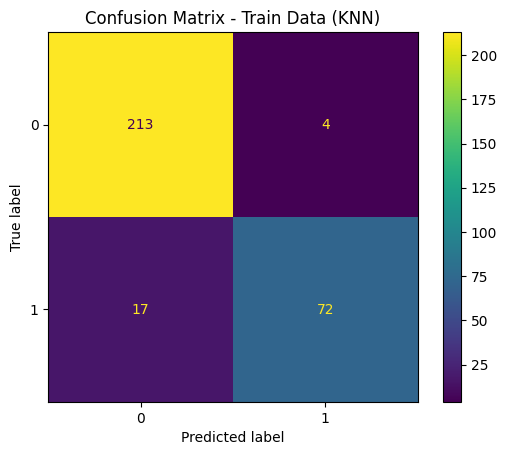

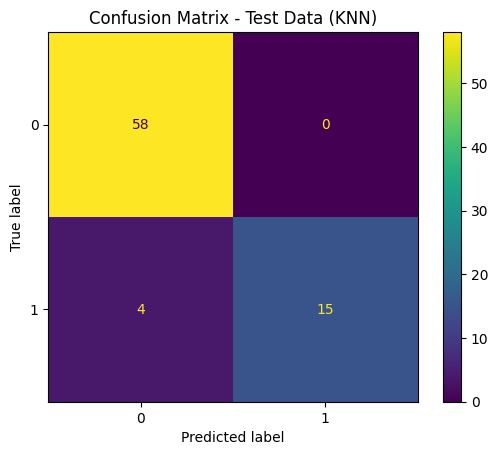

In [50]:
cm_train_KNN_train = confusion_matrix(y_train, y_pred_KNN_train)
cm_train_KNN_test = confusion_matrix(y_test, y_pred_KNN_test)

print('recall - Train Set  : ', recall_score(y_train, y_pred_KNN_train), '\n')
print('recall - Test Set  : ', recall_score(y_test, y_pred_KNN_test), '\n')

print("KNN Train:\n", classification_report(y_train, y_pred_KNN_train, zero_division=0))
print("KNN Test:\n", classification_report(y_test, y_pred_KNN_test, zero_division=0))

print(f'model berdasarkan recall tergolong {evaluate_fit_by_recall(recall_score(y_train, y_pred_KNN_train),recall_score(y_test, y_pred_KNN_test))}')

# Plot confusion matrix train
disp = ConfusionMatrixDisplay(cm_train_KNN_train)
disp.plot()
disp.ax_.set_title("Confusion Matrix - Train Data (KNN)")

# Plot confusion matrix test
disp = ConfusionMatrixDisplay(cm_train_KNN_test)
disp.plot()
disp.ax_.set_title("Confusion Matrix - Test Data (KNN)")

Berdasarkan hasil evaluasi, model KNN menunjukkan performa recall sebesar `0.89` pada data latih dan `0.79` pada data uji. Ini mengindikasikan bahwa model mampu mengenali sebagian besar kasus positif (recurred) dengan cukup baik, baik saat dilatih maupun diuji pada data baru. Perbedaan recall antara train dan test tidak terlalu besar, menandakan model cukup stabil dan tidak overfitting. Dengan demikian, dari sisi recall, model KNN tergolong baik untuk digunakan dalam konteks deteksi dini recurred.

## 2. SVM

### - Prediksi Model

In [51]:
# Logistic Regression
y_pred_SVM_train = SVM_pipeline.predict(X_train)
y_pred_SVM_test = SVM_pipeline.predict(X_test)

### - Confusion Matrix & Classification/ Report

recall - Train Set  :  0.8876404494382022 

recall - Test Set  :  0.8947368421052632 

SVM Train:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       217
           1       0.98      0.89      0.93        89

    accuracy                           0.96       306
   macro avg       0.97      0.94      0.95       306
weighted avg       0.96      0.96      0.96       306

SVM Test:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        58
           1       1.00      0.89      0.94        19

    accuracy                           0.97        77
   macro avg       0.98      0.95      0.96        77
weighted avg       0.97      0.97      0.97        77

model berdasarkan recall tergolong Good Fit


Text(0.5, 1.0, 'Confusion Matrix - Test Data (SVM)')

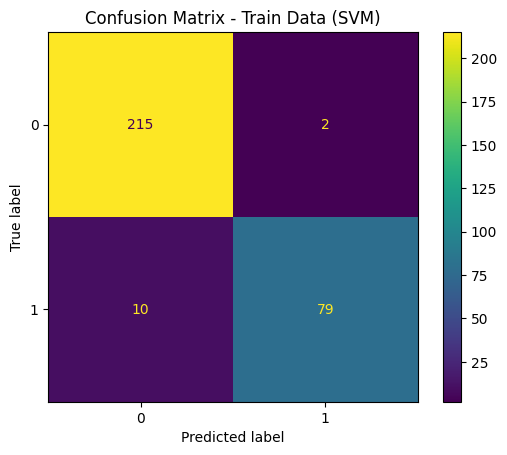

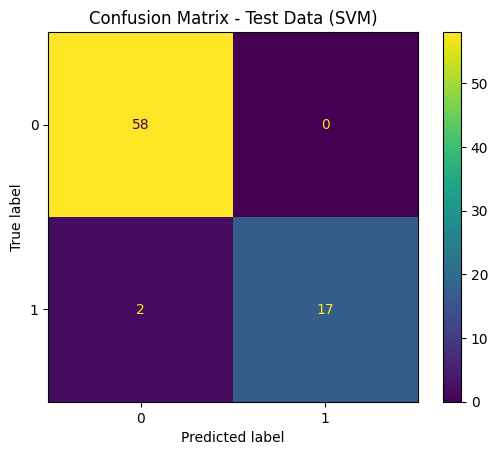

In [52]:
cm_train_SVM_train = confusion_matrix(y_train, y_pred_SVM_train)
cm_train_SVM_test = confusion_matrix(y_test, y_pred_SVM_test)

print('recall - Train Set  : ', recall_score(y_train, y_pred_SVM_train), '\n')
print('recall - Test Set  : ', recall_score(y_test, y_pred_SVM_test), '\n')

print("SVM Train:\n", classification_report(y_train, y_pred_SVM_train, zero_division=0))
print("SVM Test:\n", classification_report(y_test, y_pred_SVM_test, zero_division=0))

print(f'model berdasarkan recall tergolong {evaluate_fit_by_recall(recall_score(y_train, y_pred_SVM_train),recall_score(y_test, y_pred_SVM_test))}')

# Plot confusion matrix train
disp = ConfusionMatrixDisplay(cm_train_SVM_train)
disp.plot()
disp.ax_.set_title("Confusion Matrix - Train Data (SVM)")

# Plot confusion matrix test
disp = ConfusionMatrixDisplay(cm_train_SVM_test)
disp.plot()
disp.ax_.set_title("Confusion Matrix - Test Data (SVM)")

Berdasarkan hasil evaluasi model SVM, nilai recall pada data latih adalah `0.89`, dan pada data uji sebesar `0.89` juga. Nilai yang konsisten ini menunjukkan bahwa model sangat stabil dan andal dalam mendeteksi kelas positif (recurred), baik saat pelatihan maupun pengujian. Konsistensi recall ini menandakan bahwa model tidak overfitting dan memiliki generalisasi yang baik. Oleh karena itu, dari sisi recall, model SVM tergolong sangat baik (good fit) untuk digunakan dalam tugas deteksi dini.

## 3. Decision Tree

### - Prediksi Model

In [53]:
# Logistic Regression
y_pred_tree_train = tree_pipeline.predict(X_train)
y_pred_tree_test = tree_pipeline.predict(X_test)

### - Confusion Matrix & Classification/ Report

recall - Train Set  :  1.0 

recall - Test Set  :  0.9473684210526315 

Decision Tree Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       217
           1       1.00      1.00      1.00        89

    accuracy                           1.00       306
   macro avg       1.00      1.00      1.00       306
weighted avg       1.00      1.00      1.00       306

Decision Tree Test:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97        58
           1       0.90      0.95      0.92        19

    accuracy                           0.96        77
   macro avg       0.94      0.96      0.95        77
weighted avg       0.96      0.96      0.96        77

model berdasarkan recall tergolong Overfit


Text(0.5, 1.0, 'Confusion Matrix - Test Data (Decision Tree)')

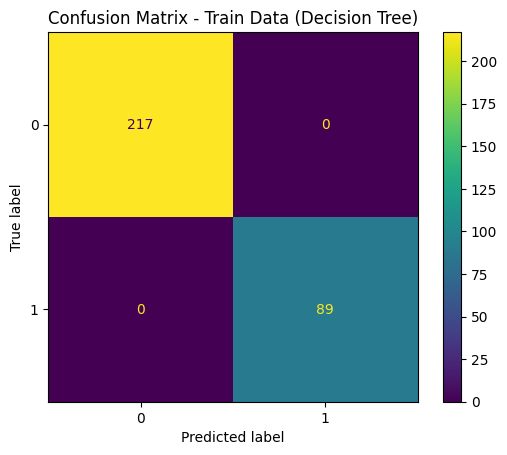

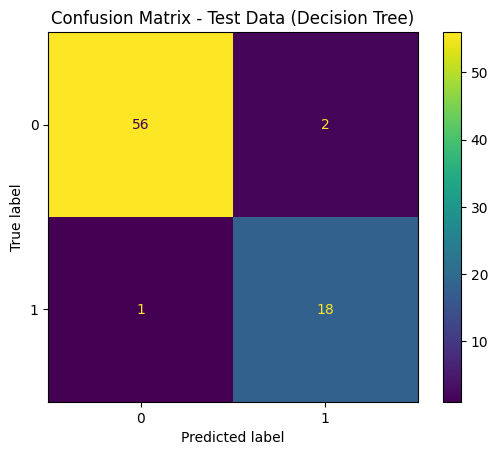

In [54]:
cm_train_tree_train = confusion_matrix(y_train, y_pred_tree_train)
cm_train_tree_test = confusion_matrix(y_test, y_pred_tree_test)

print('recall - Train Set  : ', recall_score(y_train, y_pred_tree_train), '\n')
print('recall - Test Set  : ', recall_score(y_test, y_pred_tree_test), '\n')

print("Decision Tree Train:\n", classification_report(y_train, y_pred_tree_train, zero_division=0))
print("Decision Tree Test:\n", classification_report(y_test, y_pred_tree_test, zero_division=0))

print(f'model berdasarkan recall tergolong {evaluate_fit_by_recall(recall_score(y_train, y_pred_tree_train),recall_score(y_test, y_pred_tree_test))}')

# Plot confusion matrix train
disp = ConfusionMatrixDisplay(cm_train_tree_train)
disp.plot()
disp.ax_.set_title("Confusion Matrix - Train Data (Decision Tree)")

# Plot confusion matrix test
disp = ConfusionMatrixDisplay(cm_train_tree_test)
disp.plot()
disp.ax_.set_title("Confusion Matrix - Test Data (Decision Tree)")

Berdasarkan hasil evaluasi model Decision Tree, nilai recall pada data latih adalah `1.00`, sedangkan pada data uji sebesar `0.95`. Meskipun recall pada data uji tergolong tinggi dan menunjukkan bahwa model sangat baik dalam mengenali kasus positif, perbedaan yang mencolok dengan recall sempurna pada data latih menandakan bahwa model mengalami overfitting. Artinya, model terlalu hafal data latih dan cenderung kurang generalisasi saat menghadapi data baru. Oleh karena itu, dari sisi recall, model Decision Tree tergolong overfit.

## 4. Random Forest

### - Prediksi Model

In [55]:
# Logistic Regression
y_pred_RFC_train = RFC_pipeline.predict(X_train)
y_pred_RFC_test = RFC_pipeline.predict(X_test)

### - Confusion Matrix & Classification/ Report

recall - Train Set  :  1.0 

recall - Test Set  :  0.9473684210526315 

Random Forest Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       217
           1       1.00      1.00      1.00        89

    accuracy                           1.00       306
   macro avg       1.00      1.00      1.00       306
weighted avg       1.00      1.00      1.00       306

Random Forest Test:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77

model berdasarkan recall tergolong Overfit


Text(0.5, 1.0, 'Confusion Matrix - Test Data (RFC)')

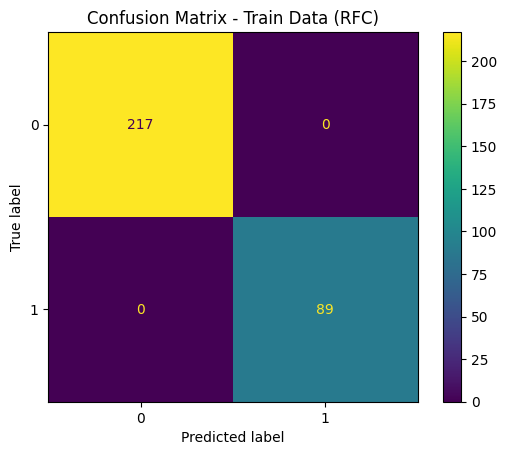

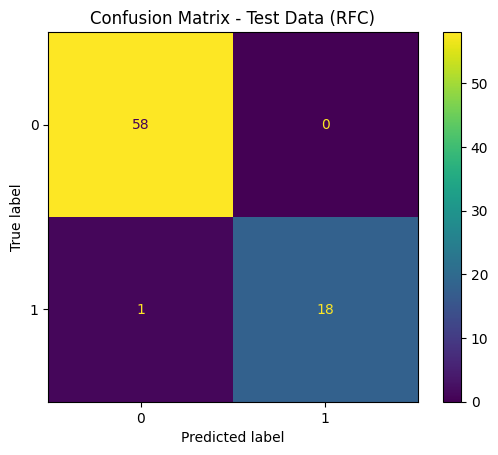

In [56]:
cm_train_RFC_train = confusion_matrix(y_train, y_pred_RFC_train)
cm_train_RFC_test = confusion_matrix(y_test, y_pred_RFC_test)

print('recall - Train Set  : ', recall_score(y_train, y_pred_RFC_train), '\n')
print('recall - Test Set  : ', recall_score(y_test, y_pred_RFC_test), '\n')

print("Random Forest Train:\n", classification_report(y_train, y_pred_RFC_train, zero_division=0))
print("Random Forest Test:\n", classification_report(y_test, y_pred_RFC_test, zero_division=0))

print(f'model berdasarkan recall tergolong {evaluate_fit_by_recall(recall_score(y_train, y_pred_RFC_train),recall_score(y_test, y_pred_RFC_test))}')

# Plot confusion matrix train
disp = ConfusionMatrixDisplay(cm_train_RFC_train)
disp.plot()
disp.ax_.set_title("Confusion Matrix - Train Data (RFC)")

# Plot confusion matrix test
disp = ConfusionMatrixDisplay(cm_train_RFC_test)
disp.plot()
disp.ax_.set_title("Confusion Matrix - Test Data (RFC)")



Berdasarkan hasil evaluasi model Random Forest, nilai recall pada data latih adalah `1.00`, sedangkan pada data uji sebesar `0.95`. Ini menunjukkan bahwa model sangat baik dalam mengenali seluruh kasus positif di data latih, namun hal tersebut juga menjadi indikasi kuat adanya overfitting. Meskipun recall pada data uji tetap tinggi dan sangat baik, selisih yang cukup signifikan dengan performa sempurna di data latih menunjukkan bahwa model terlalu menyesuaikan diri terhadap data pelatihan. Oleh karena itu, dari sudut pandang recall, model Random Forest termasuk dalam kategori overfit.

## 5. XGBoost

### - Prediksi Model

In [57]:
# Logistic Regression
y_pred_XGB_train = XGB_pipeline.predict(X_train)
y_pred_XGB_test = XGB_pipeline.predict(X_test)

### - Confusion Matrix & Classification/ Report

recall - Train Set  :  1.0 

recall - Test Set  :  0.9473684210526315 

XGBoost Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       217
           1       1.00      1.00      1.00        89

    accuracy                           1.00       306
   macro avg       1.00      1.00      1.00       306
weighted avg       1.00      1.00      1.00       306

XGBoost Test:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.95      0.95      0.95        19

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.97      0.97      0.97        77

model berdasarkan recall tergolong Overfit


Text(0.5, 1.0, 'Confusion Matrix - Test Data (XGB)')

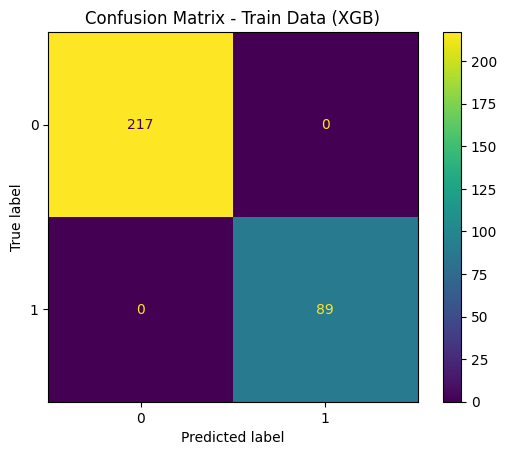

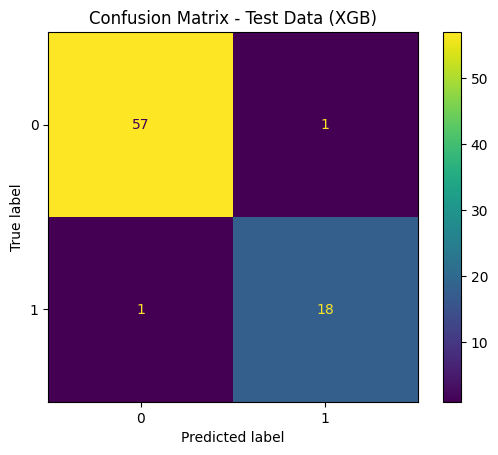

In [58]:
cm_train_XGB_train = confusion_matrix(y_train, y_pred_XGB_train)
cm_train_XGB_test = confusion_matrix(y_test, y_pred_XGB_test)

print('recall - Train Set  : ', recall_score(y_train, y_pred_XGB_train), '\n')
print('recall - Test Set  : ', recall_score(y_test, y_pred_XGB_test), '\n')

print("XGBoost Train:\n", classification_report(y_train, y_pred_XGB_train, zero_division=0))
print("XGBoost Test:\n", classification_report(y_test, y_pred_XGB_test, zero_division=0))

print(f'model berdasarkan recall tergolong {evaluate_fit_by_recall(recall_score(y_train, y_pred_XGB_train),recall_score(y_test, y_pred_XGB_test))}')

# Plot confusion matrix train
disp = ConfusionMatrixDisplay(cm_train_XGB_train)
disp.plot()
disp.ax_.set_title("Confusion Matrix - Train Data (XGB)")

# Plot confusion matrix test
disp = ConfusionMatrixDisplay(cm_train_XGB_test)
disp.plot()
disp.ax_.set_title("Confusion Matrix - Test Data (XGB)")

Berdasarkan hasil evaluasi model XGBoost, diperoleh nilai recall sebesar `1.00` pada data latih dan `0.95` pada data uji. Meskipun nilai recall pada data uji masih tergolong sangat tinggi, perbedaan yang mencolok dengan hasil sempurna pada data latih menunjukkan adanya indikasi overfitting. Model terlalu optimal dalam mengenali kasus positif di data pelatihan, namun berisiko kehilangan generalisasi saat diterapkan ke data baru. Oleh karena itu, dari sisi recall, model XGBoost tergolong overfit,

## Komparasi Model

In [59]:
# Contoh hasil prediksi dari berbagai model
y_pred_train = {
    'KNN': y_pred_KNN_train,
    'SVM': y_pred_SVM_train,
    'Decision Tree': y_pred_tree_train,
    'Random Forest': y_pred_RFC_train,
    'XGB': y_pred_XGB_train
}

y_pred_test = {
    'KNN': y_pred_KNN_test,
    'SVM': y_pred_SVM_test,
    'Decision Tree': y_pred_tree_test,
    'Random Forest': y_pred_RFC_test,
    'XGB': y_pred_XGB_test
}

results = []

for model in y_pred_train.keys():
    recall_train = recall_score(y_train, y_pred_train[model])
    recall_test = recall_score(y_test, y_pred_test[model])
    performa = evaluate_fit_by_recall(recall_train, recall_test)

    results.append({
        'Model': model,
        'Recall Train': recall_train,
        'Recall Test': recall_test,
        'Performa Model': performa
    })

# 3. Ubah jadi DataFrame
df_recall = pd.DataFrame(results)

# 4. Pastikan kfold_result punya kolom 'Model' agar bisa merge
df_cv = pd.DataFrame(kfold_result)
df_cv['Model'] = df_recall['Model']  # Asumsikan urutannya sama

# 5. Gabungkan kedua DataFrame
df_final = pd.merge(df_recall, df_cv, on='Model')

# 6. Tampilkan hasil
display(df_final)

,Model,Recall Train,Recall Test,Performa Model,Recall - Range - Cross Validation,Recall - Mean - Cross Validation,Recall - Std - Cross Validation
0,KNN,0.808989,0.789474,Good Fit,"(0.653952598668262, -, 0.9154918457761824)",0.784722,0.130770
1,SVM,0.887640,0.894737,Good Fit,"(0.7358723830956414, -, 0.9946831724599142)",0.865278,0.129405
2,Decision Tree,1.000000,0.947368,Overfit,"(0.7716313057048162, -, 0.9811464720729616)",0.876389,0.104758
3,Random Forest,1.000000,0.947368,Overfit,"(0.7935593161258296, -, 1.0036629060963929)",0.898611,0.105052
4,XGB,1.000000,0.947368,Overfit,"(0.8060544051025216, -, 0.9911678171197009)",0.898611,0.092557


Berdasarkan tabel hasil evaluasi di atas, model XGBoost dan Random Forest memiliki nilai recall tertinggi secara konsisten baik pada data training, testing, maupun cross-validation (mean recall = `0.8986`), disertai standar deviasi yang paling rendah (`0.09–0.10`), menandakan performa yang stabil. Namun, keduanya menunjukkan gejala overfitting karena recall training sempurna (`1.0`) dan selisih cukup besar dengan recall test. 

dibandingkan dengan model SVM dan KNN menunjukkan Good Fit, dengan gap recall yang kecil antara data train dan test, serta performa yang cukup kompetitif. Dari sisi stabilitas dan generalisasi, SVM menjadi pilihan terbaik karena memiliki recall tinggi (`0.8947`), generalisasi kuat, dan hasil cross-validation yang mendekati XGB namun tanpa indikasi overfit. 

Maka, SVM merupakan model terbaik secara keseluruhan, seimbang dalam performa, stabilitas, dan kemampuan generalisasi.

# ix. Hyperparameter Tuning

## Model Terbaik

In [60]:
SVM_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age'], dtype='object')),
                                                 ('nom',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Smoking',
                                                   'Hx Radiothreapy',
                                                   'Adenopathy', 'Pathology',
                                                   'Focality', 'Response']),
                                                 ('or',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['T', 'N', 'M', 'Stage',
                                                   'Risk'])])),
                ('classifier', SVC(probability=True, random_state=42))])

## Parameter Tuning

In [ ]:
param_grid_svm = {
    # Regularisasi: dari lemah (besar C) sampai ketat (kecil C)
    'classifier__C': np.logspace(-2, 2, 6),  

    # Kernel SVM
    'classifier__kernel': ['linear', 'rbf'],

    # Gamma hanya relevan untuk kernel rbf, poly, sigmoid
    'classifier__gamma': ['scale', 'auto'] + list(np.logspace(-4, -1, 3)),  # [1e-4, 1e-3, 1e-2, scale, auto]

    # Derajat polynomial (hanya aktif jika kernel='poly')
    'classifier__degree': [2, 3],  # Jangan terlalu besar agar tidak overfit

    # Class weight seimbang bila data tidak balance
    'classifier__class_weight': ['balanced', None],

    # Opsional untuk percepatan & regularisasi tambahan
    'classifier__shrinking': [True],
    'classifier__tol': [1e-3, 1e-4]
}

1. `C (Regularisasi)`: parameter regulasi yang mengontrol margin vs error. Semakin kecil maka model menjadi tidak bagus (margin besar, toleransi error tinggi) dan semakin besar maka model menjadi lebih bagus (margin kecil, tapi bisa overfit).

    - np.logspace(-2, 2, 6) : artinya nilai dari 0.001 sampai 100 dalam skala log, cocok karena C biasanya sensitif.

2.  `kernel`: Fungsi kernel mengontrol bagaimana data diproyeksikan ke ruang berdimensi lebih tinggi.

    - 'linear': digunakan jika data cukup terpisah secara linier.

    - 'rbf': paling umum, menangani non-linear.

3.  `gamma`: Gamma mengontrol berapa jauh pengaruh satu titik data.

    - Gamma dikontrol dengan nilai ['scale', 'auto', 1e-4, 1e-3, 1e-2]

    - Untuk kernel rbf, gamma mempengaruhi seberapa jauh pengaruh sebuah sample.

    - Nilai kecil = pengaruh lebih luas → model lebih halus.

    - Nilai besar = pengaruh sempit → model lebih kompleks (berisiko overfit). Variasi ini digunakan untuk mengeksplorasi efek kompleksitas non-linear.

4. `degree`: Menentukan tingkat polinomial yang digunakan.

    - eksplor dari derajat 2–3,

5.  `class_weight`: Ini penting kalau misalnya jumlah label 0 dan 1 tidak seimbang Jadi ini bentuk penanganan imbalance tanpa harus oversampling/undersampling.

    - 'balanced' membuat model memperhitungkan jumlah data tidak seimbang antar kelas. 
<br>
6. `classifier__shrinking`: Disetel ke True karena algoritma shrinking heuristik dapat mempercepat proses training SVM, terutama pada dataset besar atau berdimensi tinggi.
<br>
7. `classifier__tol`: Digunakan untuk mengontrol toleransi konvergensi algoritma. Nilai 1e-3 dan 1e-4 memungkinkan saya mengatur seberapa cepat model berhenti saat sudah konvergen.

    - Nilai kecil = hasil lebih presisi, tapi waktu training bisa lebih lama.

## Algoritma Hyperparameter

In [62]:
grid_search_svm = GridSearchCV(
    estimator=SVM_pipeline,
    param_grid=param_grid_svm,                        
    scoring='recall',                   
    cv=10,                              
    verbose=1,
    n_jobs=-1
)

Pada tahap ini dilakukan proses hyperparameter tuning menggunakan algoritma `GridSearchCV` untuk model `SVM_pipeline`. parameter yang akan dicoba diambil dari `param_grid_svc`, dengan evaluasi berbasis metrik recall, yang sesuai dengan tujuan untuk memaksimalkan deteksi kasus positif. Proses tuning menggunakan `10-fold cross-validation`,`verbose=1` berfungsi untuk mengontrol seberapa banyak informasi yang dicetak ke layar selama proses pencarian hyperparameter berlangsung, dan `n_jobs=-1` untuk memanfaatkan seluruh core CPU agar proses lebih cepat. Pendekatan ini memungkinkan pencarian parameter yang optimal secara efisien tanpa harus mengevaluasi seluruh kombinasi secara menyeluruh.

## Tuning

In [63]:
grid_search_svm.fit(X_train, y_train)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Age'], dtype='object')),
                                                                        ('nom',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Smoking',
                                                                          'Hx '
                                                                          'Radiothreapy',
                                                                          'Adenopathy',
                                                                          'Pathology',
                                                                          'Focality',
                                                                          'Response']),
                                                                        ('or',
                                                                         Pi...
             param_grid={'classifier__C': array([1.00000000e-02, 6.30957344e-02, 3.98107171e-01, 2.51188643e+00,
       1.58489319e+01, 1.00000000e+02]),
                         'classifier__class_weight': ['balanced', None],
                         'classifier__degree': [2, 3],
                         'classifier__gamma': ['scale', 'auto',
                                               np.float64(0.0001),
                                               np.float64(0.0031622776601683794),
                                               np.float64(0.1)],
                         'classifier__kernel': ['linear', 'rbf'],
                         'classifier__shrinking': [True],
                         'classifier__tol': [0.001, 0.0001]},
             scoring='recall', verbose=1)

## parameter Terbaik

In [64]:
best_params_df = pd.DataFrame([grid_search_svm.best_params_])
display(best_params_df)

,classifier__C,classifier__class_weight,classifier__degree,classifier__gamma,classifier__kernel,classifier__shrinking,classifier__tol
0,15.848932,balanced,2,auto,rbf,True,0.001


## Model Terbaik

In [65]:
# Gunakan model terbaik
best_SVM = grid_search_svm.best_estimator_

## Model Evaluation

### SVM Sebelum Tuning

#### - Prediksi Model

In [66]:
# Logistic Regression
y_pred_SVM_train = SVM_pipeline.predict(X_train)
y_pred_SVM_test = SVM_pipeline.predict(X_test)

#### - Confusion Matrix & Classification/ Report

recall - Train Set  :  0.8876404494382022 

recall - Test Set  :  0.8947368421052632 

SVM Train:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       217
           1       0.98      0.89      0.93        89

    accuracy                           0.96       306
   macro avg       0.97      0.94      0.95       306
weighted avg       0.96      0.96      0.96       306

SVM Test:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        58
           1       1.00      0.89      0.94        19

    accuracy                           0.97        77
   macro avg       0.98      0.95      0.96        77
weighted avg       0.97      0.97      0.97        77

model berdasarkan recall tergolong Good Fit


Text(0.5, 1.0, 'Confusion Matrix - Test Data (SVM Sebelum Tuning)')

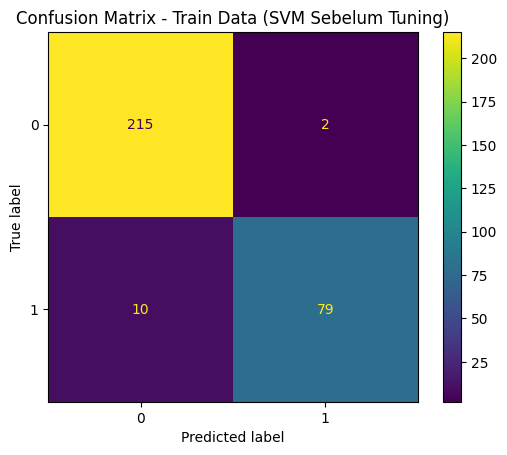

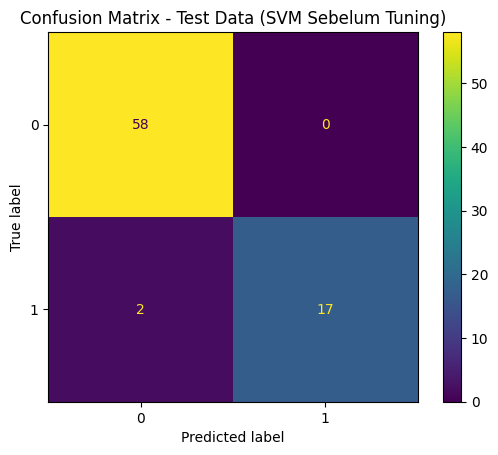

In [67]:
cm_train_SVM_train = confusion_matrix(y_train, y_pred_SVM_train)
cm_train_SVM_test = confusion_matrix(y_test, y_pred_SVM_test)

print('recall - Train Set  : ', recall_score(y_train, y_pred_SVM_train), '\n')
print('recall - Test Set  : ', recall_score(y_test, y_pred_SVM_test), '\n')

print("SVM Train:\n", classification_report(y_train, y_pred_SVM_train, zero_division=0))
print("SVM Test:\n", classification_report(y_test, y_pred_SVM_test, zero_division=0))

print(f'model berdasarkan recall tergolong {evaluate_fit_by_recall(recall_score(y_train, y_pred_SVM_train),recall_score(y_test, y_pred_SVM_test))}')

# Plot confusion matrix train
disp = ConfusionMatrixDisplay(cm_train_SVM_train)
disp.plot()
disp.ax_.set_title("Confusion Matrix - Train Data (SVM Sebelum Tuning)")

# Plot confusion matrix test
disp = ConfusionMatrixDisplay(cm_train_SVM_test)
disp.plot()
disp.ax_.set_title("Confusion Matrix - Test Data (SVM Sebelum Tuning)")

Berdasarkan hasil evaluasi model SVM, nilai recall pada data latih adalah `0.89`, dan pada data uji sebesar `0.89` juga. Nilai yang konsisten ini menunjukkan bahwa model sangat stabil dan andal dalam mendeteksi kelas positif (recurred), baik saat pelatihan maupun pengujian. Konsistensi recall ini menandakan bahwa model tidak overfitting dan memiliki generalisasi yang baik. Oleh karena itu, dari sisi recall, model SVM tergolong sangat baik (good fit) untuk digunakan dalam tugas deteksi dini.

### SVM Setelah Tuning

In [68]:
y_pred_best_SVM_train = best_SVM.predict(X_train)
y_pred_best_SVM_test = best_SVM.predict(X_test)

##### - Confusion Matrix & Classification/ Report

recall - Train Set  :  0.9775280898876404 

recall - Test Set  :  0.9473684210526315 

SVM Train:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       217
           1       0.99      0.98      0.98        89

    accuracy                           0.99       306
   macro avg       0.99      0.99      0.99       306
weighted avg       0.99      0.99      0.99       306

SVM Test:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77

model berdasarkan recall tergolong Good Fit


Text(0.5, 1.0, 'Confusion Matrix - Test Data (SVM Setelah Tuning)')

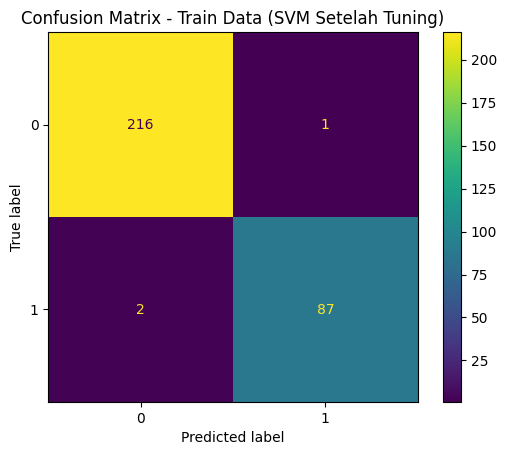

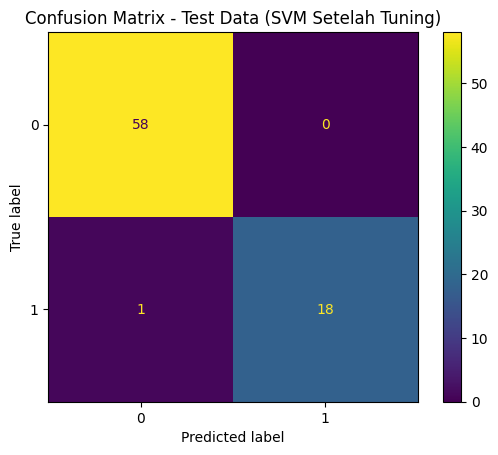

In [69]:
cm_train_SVM_train = confusion_matrix(y_train, y_pred_best_SVM_train)
cm_train_SVM_test = confusion_matrix(y_test, y_pred_best_SVM_test)

print('recall - Train Set  : ', recall_score(y_train, y_pred_best_SVM_train), '\n')
print('recall - Test Set  : ', recall_score(y_test, y_pred_best_SVM_test), '\n')

print("SVM Train:\n", classification_report(y_train, y_pred_best_SVM_train, zero_division=0))
print("SVM Test:\n", classification_report(y_test, y_pred_best_SVM_test, zero_division=0))

print(f'model berdasarkan recall tergolong {evaluate_fit_by_recall(recall_score(y_train, y_pred_best_SVM_train),recall_score(y_test, y_pred_best_SVM_test))}')

# Plot confusion matrix train
disp = ConfusionMatrixDisplay(cm_train_SVM_train)
disp.plot()
disp.ax_.set_title("Confusion Matrix - Train Data (SVM Setelah Tuning)")

# Plot confusion matrix test
disp = ConfusionMatrixDisplay(cm_train_SVM_test)
disp.plot()
disp.ax_.set_title("Confusion Matrix - Test Data (SVM Setelah Tuning)")

Berdasarkan hasil evaluasi model SVM yang telah dituning (best SVM), diperoleh nilai recall sebesar `0.98` pada data latih dan `0.95` pada data uji dan lebih baik dibandingkan dengan SVM yang belum dituning. Kedua nilai tersebut sangat tinggi dan mendekati sempurna, serta memiliki selisih yang kecil, yang mengindikasikan bahwa model mampu mengenali kasus positif secara akurat tanpa overfitting. Konsistensi antara performa train dan test menunjukkan bahwa model memiliki kemampuan generalisasi yang baik. Oleh karena itu, dari sisi recall, model best SVM tergolong Good Fit dan sangat layak digunakan dalam konteks deteksi dini recurred.

#### Komparasi SVC Sebelum Tuning dan Setelah Tuning

In [70]:
# Contoh hasil prediksi dari berbagai model
y_pred_train = {
    'SVM Setelah Tuning': y_pred_best_SVM_train,
    'SVM Sebelum Tuning': y_pred_SVM_train,
}

y_pred_test = {
    'SVM Setelah Tuning': y_pred_best_SVM_test,
    'SVM Sebelum Tuning': y_pred_SVM_test,
}

results = []

for model in y_pred_train.keys():
    recall_train = recall_score(y_train, y_pred_train[model])
    recall_test = recall_score(y_test, y_pred_test[model])
    performa = evaluate_fit_by_recall(recall_train, recall_test)

    results.append({
        'Model': model,
        'Recall Train': recall_train,
        'Recall Test': recall_test,
        'Performa Model': performa
    })

# Buat DataFrame hasil
pd.DataFrame(results)

,Model,Recall Train,Recall Test,Performa Model
0,SVM Setelah Tuning,0.977528,0.947368,Good Fit
1,SVM Sebelum Tuning,0.887640,0.894737,Good Fit


Berdasarkan hasil komparasi model SVM sebelum dan sesudah tuning, terlihat bahwa tuning berhasil meningkatkan performa recall. Recall pada data latih meningkat dari `0.88` menjadi `0.98`, dan pada data uji dari` 0.89` menjadi `0.95`. Keduanya masih tergolong Good Fit, namun model setelah tuning menunjukkan kemampuan deteksi yang lebih tinggi dan stabil dalam mengenali kasus positif. Ini membuktikan bahwa proses tuning berkontribusi signifikan dalam memperbaiki kualitas model tanpa menyebabkan overfitting.

___
# x. Model Saving
___

Langkah penyimpanan model bertujuan untuk menyimpan model Support Vector Machine (SVM) terbaik yang telah dilatih dan dituning sehingga dapat digunakan kembali tanpa perlu melatih ulang dari awal. Dengan menyimpan model menggunakan format .pkl, proses deployment atau integrasi ke dalam sistem klinis akan menjadi lebih efisien dan reproducible. Hal ini sangat penting dalam konteks deteksi dini recurred kanker tiroid, agar model dapat segera dimanfaatkan oleh tenaga medis dalam pengambilan keputusan berbasis data.

In [71]:
with open('model_SVM.pkl', 'wb' ) as file:
    pickle.dump(best_SVM, file)

___
# xi. Model Inference
___

[inference](P1M2_Inference_Putra_Fisabil_Muhammad.ipynb)

___
# xii. Pengambilan Kesimpulan
___

&emsp;Dalam penelitian ini, telah dikembangkan model machine learning untuk memprediksi potensi recurred pada pasien Differentiated Thyroid Cancer (DTC), sebuah jenis kanker yang meskipun umumnya tidak agresif, tetap memiliki risiko kambuh pascaoperasi. Mengingat pentingnya deteksi dini terhadap risiko recurred demi mendukung pemantauan klinis dan perencanaan terapi lanjutan oleh dokter, metrik recall dijadikan fokus utama evaluasi untuk memaksimalkan deteksi kasus yang berpotensi kambuh (true positive).

&emsp;Berdasarkan hasil evaluasi terhadap berbagai algoritma, model SVM setelah tuning menunjukkan performa terbaik secara keseluruhan. Model ini berhasil mencapai recall tinggi, performa stabil dalam cross-validation, dan tergolong good fit, yang berarti mampu generalisasi dengan baik tanpa overfitting. Model ini layak direkomendasikan sebagai alat bantu awal untuk mendukung dokter dalam mengidentifikasi pasien yang perlu perhatian lebih setelah tindakan medis awal dilakukan.

&emsp;Untuk pengembangan lebih lanjut, model prediksi recurred pada pasien Differentiated Thyroid Cancer (DTC) masih dapat disempurnakan dengan beberapa pendekatan strategis. Pertama, perluasan dataset sangat disarankan agar model memiliki kemampuan generalisasi yang lebih baik dan mampu menangkap pola yang lebih beragam dari populasi pasien yang sebenarnya. Selain itu, jika distribusi target cenderung tidak seimbang antara pasien yang recurred dan tidak, maka penanganan imbalance seperti resampling (misalnya SMOTE) dapat membantu model lebih sensitif dalam mengenali kasus recurred. Dari sisi fitur, disarankan untuk melakukan feature engineering tambahan, khususnya dengan memasukkan variabel klinis penting seperti kadar hormon, hasil radiologi, atau data tindak lanjut medis. Tak kalah penting, penggunaan metode interpretabilitas model seperti SHAP atau LIME juga direkomendasikan agar dokter dapat memahami faktor-faktor yang mendorong keputusan model, sehingga hasil prediksi dapat diterima dengan lebih percaya. Terakhir, untuk memastikan akurasi dan keandalan model dalam praktik klinis, validasi lebih lanjut pada data eksternal atau uji prospektif perlu dilakukan sebelum model ini digunakan sebagai alat bantu keputusan dalam pengelolaan pasien pascaoperasi.

[SMOTE](https://biodatamining.biomedcentral.com/articles/10.1186/s13040-023-00330-4)

[SHAP](https://www.sciencedirect.com/science/article/pii/S2213231724004488)